# Bank Customer Churn Modelling

## Project Description

Being proactive, detecting in advance if a customer is planning to leave, and reacting in time to convince them to stay can result in a more satisfied customer base. Also, it can help understand your customers and why they like or dislike your business. This dataset can help a banking institution reduce churn and offer more tailored products to their customers.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Description

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/The-Vaibhav-Yadav/Customer_Churn/refs/heads/main/Churn_Modelling.csv")

Dataset is downloaded from :https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

Description of dependent and independent features

**RowNumber**: An index value representing the row number of each entry in the dataset.
Values: Sequential integer values starting from 1.


**CustomerId**: A unique identification number for each customer.Numeric values, uniquely identifying each customer.

**Surname**:The last name (surname) of the customer.String values representing customer surnames.

**CreditScore**: The credit score of the customer.Integer values representing the customer's creditworthiness, typically ranging from 300 to 850.

**Geography**: The country where the customer resides. Categorical values, typically representing countries such as 'France', 'Germany', and 'Spain'.

**Gender**: The gender of the customer. Categorical values, usually 'Male' or 'Female'.

**Age**: The age of the customer. Integer values representing the customer's age, typically in years.

**Tenure**:The number of years the customer has been with the bank. Integer values representing tenure, usually ranging from 0 to 10 years.

**Balance**: The account balance of the customer.Numeric values representing the customer's balance in their bank account.

**NumOfProducts**:The number of products the customer has purchased from the bank.Integer values, ranging from 1 to 4.

**HasCrCard**: Whether the customer has a credit card or not. Binary values, where 1 indicates the customer has a credit card, and 0 indicates they do not.

**IsActiveMember**: Whether the customer is an active member of the bank. Binary values, where 1 indicates the customer is active, and 0 indicates they are not.

**EstimatedSalary**:The estimated annual salary of the customer. Numeric values representing the customer's estimated salary.

**Exited**:Whether the customer has churned (i.e., left the bank).
Values: Binary values, where 1 indicates the customer has exited the bank (churned), and 0 indicates they have not.


## **Dataset Size**

In [ ]:
print('Number of columns in data is', len(list(df.columns)))
print('Number of rows in data is', df.shape[0])

In [ ]:
df

## **About the Dataset**

In [ ]:
df["CustomerId"].is_unique

In [ ]:
df.info()

In [ ]:
print("Summary Statistics of the Data")
df.describe()

In [ ]:
# Initial Data Insights

# 1. Total number of customers
total_customers = df.shape[0]
print(f"Total number of customers: {total_customers}")
print()

# 2. Number of churned customers
churned_customers = df[df['Exited'] == 1].shape[0]
print(f"Number of churned customers: {churned_customers}")
print()

# 3. Churn rate
churn_rate = (churned_customers / total_customers) * 100
print(f"Churn rate: {churn_rate:.2f}%")
print()

# 4. Average Credit Score
avg_credit_score = df['CreditScore'].mean()
print(f"Average Credit Score: {avg_credit_score:.2f}")
print()

# 5. Average Age
avg_age = df['Age'].mean()
print(f"Average Age: {avg_age:.2f}")
print()

# 6. Average Balance
avg_balance = df['Balance'].mean()
print(f"Average Balance: {avg_balance:.2f}")
print()

# 7. Percentage of Active Members
active_members_rate = (df[df['IsActiveMember'] == 1].shape[0] / total_customers) * 100
print(f"Percentage of Active Members: {active_members_rate:.2f}%")
print()

# 8. Gender Distribution
gender_distribution = df['Gender'].value_counts(normalize=True) * 100
print("Gender Distribution (%):")
print(gender_distribution)

# 9. Geography Distribution
geography_distribution = df['Geography'].value_counts(normalize=True) * 100
print("\nGeography Distribution (%):")
print(geography_distribution)

# 10. Average Tenure
avg_tenure = df['Tenure'].mean()
print(f"\nAverage Tenure: {avg_tenure:.2f} years")
print()

# 11. Average Number of Products
avg_products = df['NumOfProducts'].mean()
print(f"Average Number of Products: {avg_products:.2f}")
print()


## **Preprocessing**

In [ ]:
df=df.drop(["RowNumber","CustomerId","Surname"],axis=1)
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
print('Number of duplicates in churn data ', df.duplicated().sum())

In [ ]:
print(df["Exited"].value_counts())
print("Data is imbalanced")


In [ ]:
column_names=df.columns
print("The names of columns in data are:",column_names)

# **EDA**

In [ ]:
plt.pie(df['Exited'].value_counts(),autopct='%1.1f%%',colors=['green','red'],labels=['Retained', 'Churned'],explode=(0,0.1),shadow=True)
plt.title('Proportion of Churned Customers')
plt.show()

As the proportion of retained and churned customers is different so this is an imbalanced dataset.

In [ ]:
plt.bar(["Retained","Churned"],[df["Exited"].value_counts()[0],df["Exited"].value_counts()[1]],edgecolor = "black")
plt.ylabel("Count of Customers")
plt.xlabel("Exit Status")
plt.title("Distribution of Customer Churn and Retention")
plt.show()


**Barplot of categorical columns with respect to target variable(Exited)**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
sns.countplot(x='Exited', hue='Gender', data=df)
plt.title('Grouped Bar Chart of Customer Churn by Gender')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.legend(title='Exited (0 = Retained, 1 = Churned)')
for p in plt.gca().patches:
    height = p.get_height()
    if height>0:
      percentage = f'{(height / df.shape[0] * 100):.1f}%'
      plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom')

plt.subplot(2, 1, 2)
sns.countplot(x='Exited', hue='Geography', data=df)
plt.title('Grouped Bar Chart of Customer Churn by Geography')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.legend(title='Exited (0 = Retained, 1 = Churned)')
for p in plt.gca().patches:
    height = p.get_height()
    if height>0:
      percentage = f'{(height / df.shape[0] * 100):.1f}%'
      plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom')

plt.tight_layout()
plt.show()


Observations :

1) Based on Gender:

        The number of males retained is more than the number of females retained and the number of females churned is more than the number of males.

2) Based on Geography:
        
        Increasing Order of Retained Customers by Country is : German<Spain<France.

        Increasing Order of Churned Customers by Country is : Spain<France=German.

**Piecharts of each categorical column of given dataset**

In [ ]:
plt.figure(figsize=(10, 12))
plt.subplot(1,2,1)
plt.pie(df['Gender'].value_counts(),autopct='%1.1f%%',colors=['cyan','magenta'],labels=['Male', 'Female'],explode=(0,0.05),shadow=True)
plt.title('Proportion of Customers based on gender')
plt.subplot(1,2,2)
plt.pie(df['Geography'].value_counts(),autopct='%1.1f%%',colors=['#ff9999', '#66b3ff', '#99ff99'],labels=['France', 'Germany','Spain'],explode=(0.05,0.025,0.05),shadow=True)
plt.title('Proportion of Customers from different Coutries')
plt.show()

**Distributions of numerical datas**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df.Age, kde=True)
plt.title("Customer Age Distribution with Normal Distribution Fit")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [ ]:
from matplotlib import pyplot as plt
plt.hist(df["Balance"],bins = 15,edgecolor = "black")
plt.title("Customer Balance")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.hist(df["Tenure"],bins = [0,1,2,3,4,5,6,7,8,9,10] ,edgecolor = "black")
plt.title("Customer Tenure Distribution")
plt.xlabel("Years")
plt.ylabel("Number of customers")
plt.show()

In [ ]:
from matplotlib import pyplot as plt
# plt.hist(df["CreditScore"],bins = 15,edgecolor = "black")
sns.histplot(df.CreditScore,kde=True)
plt.title("Customer Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

We can see that the credit score frequency distribution and age fequency distribution plots are showing normal distribution.

**Boxplots**

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Box Plot of EstimatedSalary vs Customer Churn')
plt.xlabel('Exited (0 = Retained, 1 = Churned)')
plt.ylabel('EstimatedSalary')

# Balance by Exited
plt.subplot(1, 2, 2)
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Box Plot of Balance vs Customer Churn')
plt.xlabel('Exited (0 = Retained, 1 = Churned)')
plt.ylabel('Balance')

plt.tight_layout()
plt.show()


Estimated Salary vs. Customer Churn (Left Plot):

- The median salary for both churned and retained customers is around the 100,000 mark.
- There are no significant outliers or notable differences between the churned and retained groups in terms of estimated salary.


Balance vs. Customer Churn (Right Plot):

- There is a visible difference in the balance between the churned and retained customers.
- Retained customers have a wider range of balances, with some having balances close to 250,000, while the churned customers have a slightly lower median balance and a shrinked range.
- So its possible that customers with higher balances might be more likely to stay with the bank, while those with lower balances tend to churn.

In [805]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='CreditScore', data=df)
plt.title('Box Plot of CreditScore by Gender')
plt.xlabel('Gender')
plt.ylabel('CreditScore')
plt.show()


Box Plot of CreditScore by Gender
- The distribution of CreditScore between the two genders appears to be quite similar. Both genders have comparable median scores, which are approximately at the same level (around 600–650). This suggests that CreditScore is relatively similar across genders.

- Both groups show outliers at the lower end, which could indicate a few individuals in both groups with significantly lower credit scores. These outliers might warrant further investigation to understand if they represent errors or are legitimate values.

**Scatter Plots for numerical Data Distribution**

In [806]:
plt.scatter(y = df["NumOfProducts"], x = df["Balance"])
plt.title("No of Products vs Balance")
plt.xlabel("Balance")
plt.ylabel("Number of products")
plt.show()

In [807]:
plt.scatter(x = df["Tenure"], y = df["Balance"])
plt.title("Balance vs Tenure")
plt.xlabel("Tenure")
plt.ylabel("Balance")
plt.show()

In [808]:
plt.scatter(y = df["Tenure"], x = df["Age"])
plt.title("Tenure vs Age")
plt.xlabel("Age")
plt.ylabel("Tenure")
plt.show()

**Multivariate Plots**

In [809]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
geo_gender_df = pd.DataFrame({
    country: grp['Gender'].value_counts()
    for country, grp in df.groupby('Geography')
})
sns.heatmap(geo_gender_df, cmap='viridis')
plt.xlabel('Geography')
plt.ylabel('Gender')
plt.show()

Above plot shows the balanced distribution of customers among genders and countries.

In [810]:
plt.figure(figsize=(10,8))
num_cols = df.select_dtypes(include=["number"]).columns
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

Maximum Correlation is shown between Age and Exited columns.
Where as Num of products and Balance has min correlation

# Detecting Outliers

In [ ]:
# Ho sake to tooltip bhi add krlo
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

1. There is no significant distribution of credit score between retained and churned customers
2. Older age people are more likely to churned
3. Higher Balance people are more likely to be churned , reducing average balance of company
4. Rest of the things (Tenure,NumofProducts,Salary) doesnt show any significant difference between churened and reatained customers



In [812]:
out_feat=["CreditScore","Age"]
outliers={}
for var in out_feat:
    q25,q75=np.percentile(df[var],[25,75])
    IQR=q75-q25
    lower_bound=q25-1.5*IQR
    upper_bound=q75+1.5*IQR
    print(lower_bound)
    print(upper_bound)
    outlier_indices=df[(df[var]<lower_bound) | (df[var]>upper_bound)].index

    outliers[var]={}

    # counting how many outliers are there
    for i in outlier_indices:
      outliers[var][df.loc[i,"Exited"]]=outliers[var].get(df.loc[i,"Exited"],0)+1

print(outliers)

383.0
919.0
14.0
62.0
{'CreditScore': {1: 15}, 'Age': {1: 73, 0: 286}}


As as our dataset is imbalanced , we will not remove outliers from retained customers as they can vanish. we will remove from churned customers

In [813]:
df_Out=df.copy()
Q1 = df[out_feat].quantile(0.25)
Q3 = df[out_feat].quantile(0.75)
IQR=Q3-Q1

# upper bound and lower bound for features containng outliers
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR


for var in out_feat:
  df_Out=df_Out.drop(df_Out[(df_Out[var]<lower[var]) & (df_Out["Exited"]==0)].index)
  df_Out=df_Out.drop(df_Out[(df_Out[var]>upper[var]) & (df_Out["Exited"]==0)].index)



In [ ]:
df_Out

Plots without Outliers

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

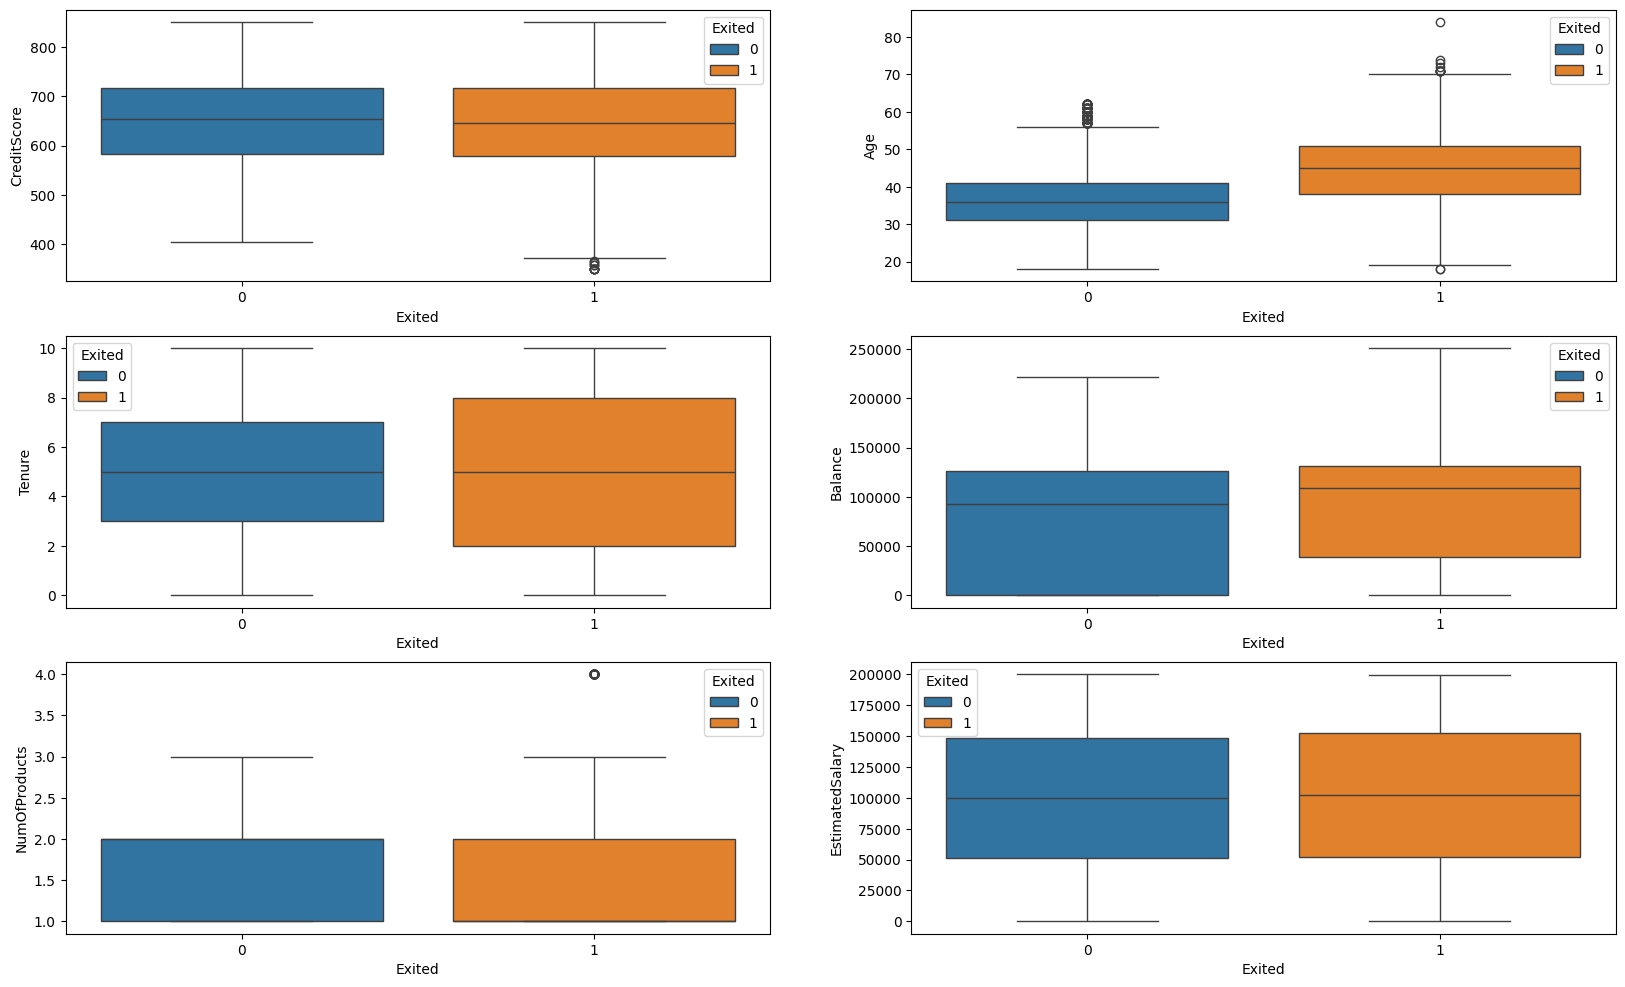

In [815]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df_Out, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df_Out , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df_Out, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df_Out, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df_Out, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df_Out, ax=axarr[2][1])

Evaluation Function

In [816]:

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

def model_eval(model_name,model,X_train_res,X_test,y_train_res,y_test):

  #prediction
  train_pred=model.predict(X_train_res)
  test_pred=model.predict(X_test)

  #probabilities
  train_proba = model.predict_proba(X_train_res)
  test_proba = model.predict_proba(X_test)

  #accuracy_score
  train_accuracy=accuracy_score(y_train_res, train_pred)
  test_accuracy=accuracy_score(y_test, test_pred)

  #recall
  train_recall = recall_score(y_train_res,train_pred, average='weighted')  # need to see why used weighted here , as mam can ask ?
  test_recall = recall_score(y_test,test_pred, average='weighted')

  #precision
  train_precision = precision_score(y_train_res,train_pred, average='weighted')
  test_precision = precision_score(y_test,test_pred, average='weighted')

  #roc_auc_score
  train_auc_score=roc_auc_score(y_train_res,train_proba[:,1], average='weighted')
  test_auc_score=roc_auc_score(y_test, test_proba[:,1], average='weighted')

  #f1_score
  train_f1 = f1_score(y_train_res,train_pred, average='weighted')
  test_f1 = f1_score(y_test,test_pred, average='weighted')

  #classification_report
  target_names=["0","1"]
  test_report = classification_report(y_test,test_pred,target_names=target_names)
  print(test_report)

  fig,(ax1,ax2)=plt.subplots(2,1,figsize=(8,14))


  #confusion_matrix
  # train_conf_mat=confusion_matrix(y_train_res, train_pred)
  test_conf_mat=confusion_matrix(y_test, test_pred,normalize="true")   # why need to use normalize ?
  sns.heatmap(test_conf_mat,annot=True,ax=ax1)
  ax1.set_xlabel('Predicted labels')
  ax1.set_ylabel('True labels')
  ax1.set_title('Confusion Matrix')

  #roc curve
  fpr, tpr, thresholds = metrics.roc_curve(y_test, test_proba[:,1])
  x=[0,1]
  y=[0,1]
  plt.plot(x,y,linestyle='dashed')
  ax2.plot(fpr, tpr, color="blue")
  ax2.set_xlabel("False Positive Rate")
  ax2.set_ylabel("True Positive Rate")
  ax2.set_title("ROC Curve")
  ax2.legend(['ROC Curve'])


  plt.show()

  return model_name,model,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1,train_auc_score,test_auc_score


We will be comparing accuracies , prediction across different versions of dataset like :

1. Dataset 1: df (without outliers, scaled, SMOTE)
2. Dataset 2: df (with outliers, scaled, SMOTE)
3. Dataset 3: df (without outliers, scaled, without oversampling)
4. Dataset 4: df (with outliers, scaled, without oversampling)

### Categorical Columns

In [817]:
cat_cols = df_Out.select_dtypes(include=["object"]).columns
cat_cols

Index(['Geography', 'Gender'], dtype='object')

# FIRST PART GOING ON

Label Encoding


In [818]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df_Out[col]=le.fit_transform(df_Out[col])

Data Scaling

In [819]:
X=df_Out.drop(columns="Exited")
y=df_Out["Exited"]

In [820]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stand_X=scaler.fit_transform(X)

Data Spilitting


In [821]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(stand_X, y, test_size=0.30, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(6799, 10)
(2915, 10)


Handling Imbalance Dataset

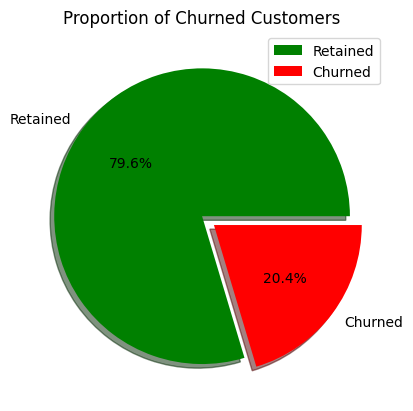

In [822]:
plt.pie(df['Exited'].value_counts(),autopct='%1.1f%%',colors=['green','red'],labels=['Retained', 'Churned'],explode=(0,0.1),shadow=True)
plt.title('Proportion of Churned Customers')
plt.legend()
plt.show()

In [823]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_train_res))

Original dataset shape 6799
Resampled dataset shape 10786


In [824]:
dd=pd.DataFrame(y_train_res)
dd["Exited"].value_counts()

Exited
0    5393
1    5393
Name: count, dtype: int64

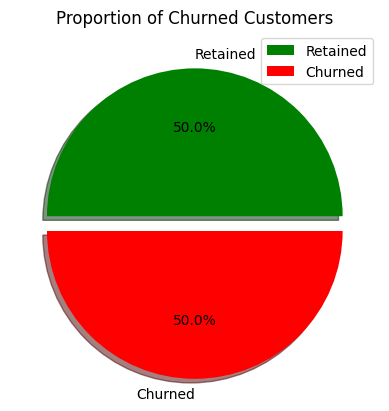

In [825]:
plt.pie(dd['Exited'].value_counts(),autopct='%1.1f%%',colors=['green','red'],labels=['Retained', 'Churned'],explode=(0,0.1),shadow=True)
plt.title('Proportion of Churned Customers')
plt.legend()
plt.show()

So Now its Balanced

# Now doing model training on dataframe(without outliers ,scaled, balanced)

**Model** **Implemetation**

A)This is for dataset which is without outliers, scaled and balanced

In [826]:
metrics_A=pd.DataFrame(columns=["model_name","model","Train_Accuracy","Test_Accuracy","Train_Recall","Test_Recall","Train_Precision","Test_Precision","Train_F1","Test_F1","Train_AUC","Test_AUC"])

Logistic Regression

In [827]:
from sklearn.linear_model import LogisticRegression
L_clf = LogisticRegression(random_state=0).fit(X_train_res, y_train_res)

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      2284
           1       0.41      0.67      0.51       631

    accuracy                           0.72      2915
   macro avg       0.65      0.70      0.66      2915
weighted avg       0.79      0.72      0.74      2915



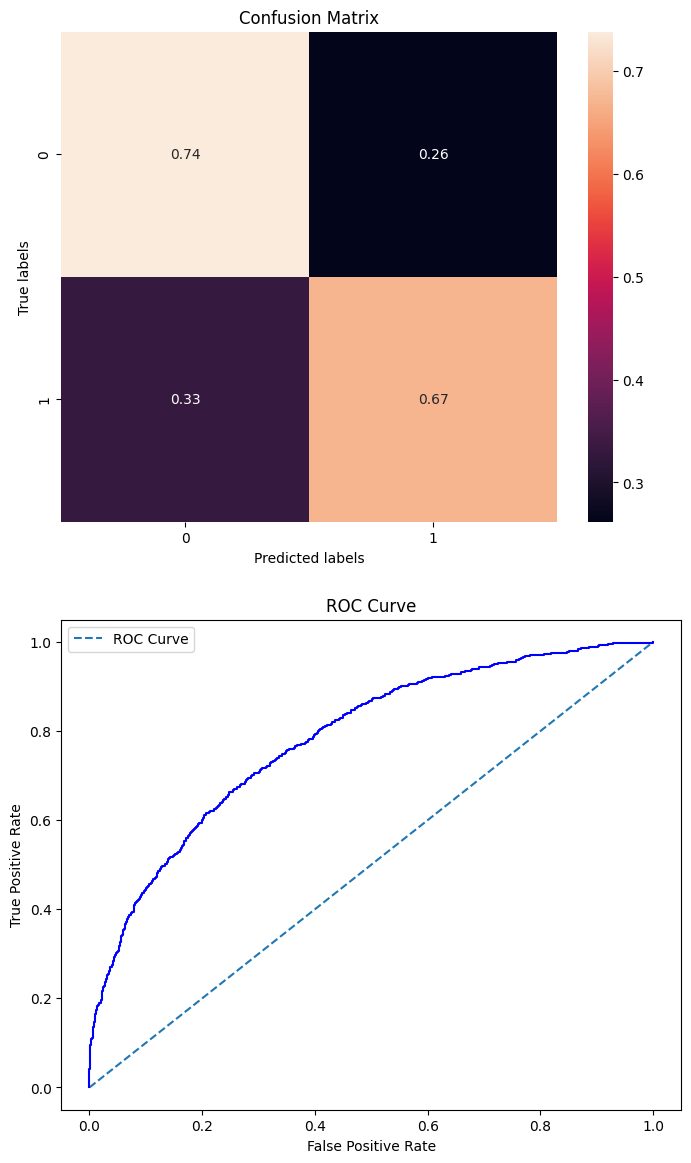

In [828]:
logistic=model_eval("Logistic_Regression",L_clf,X_train_res,X_test,y_train_res,y_test)

In [829]:
logi=logistic
print(logi)

('Logistic_Regression', LogisticRegression(random_state=0), 0.7329872056369368, 0.7234991423670669, 0.7329872056369368, 0.7234991423670669, 0.7330027154118353, 0.7871674528827437, 0.7329827621508965, 0.7432318173039631, 0.8029297374689821, 0.7822584450223564)


In [830]:
metrics_A.loc[0]=list(logistic)

In [831]:
metrics_A

model_name                               model  Train_Accuracy  \
0  Logistic_Regression  LogisticRegression(random_state=0)        0.732987   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.723499      0.732987     0.723499         0.733003        0.787167   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.732983  0.743232    0.80293  0.782258

Logistic Regression with Hyperparameter Tuning

In [832]:
from sklearn.model_selection import RandomizedSearchCV
param_list={
    "C":[0.01,0.1,1,10],
    "max_iter":[20,50,100,150],
    "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}

In [833]:
LHT_clf = LogisticRegression()
log_CV = RandomizedSearchCV(LHT_clf,param_list,n_iter=20)
log_CV.fit(X_train_res,y_train_res)

RandomizedSearchCV(estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'max_iter': [20, 50, 100, 150],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [834]:
print("best parameters: ",log_CV.best_params_)
best_log_cv=log_CV.best_estimator_

best parameters:  {'solver': 'liblinear', 'max_iter': 150, 'C': 0.01}


              precision    recall  f1-score   support

           0       0.89      0.73      0.80      2284
           1       0.41      0.68      0.51       631

    accuracy                           0.72      2915
   macro avg       0.65      0.71      0.66      2915
weighted avg       0.79      0.72      0.74      2915



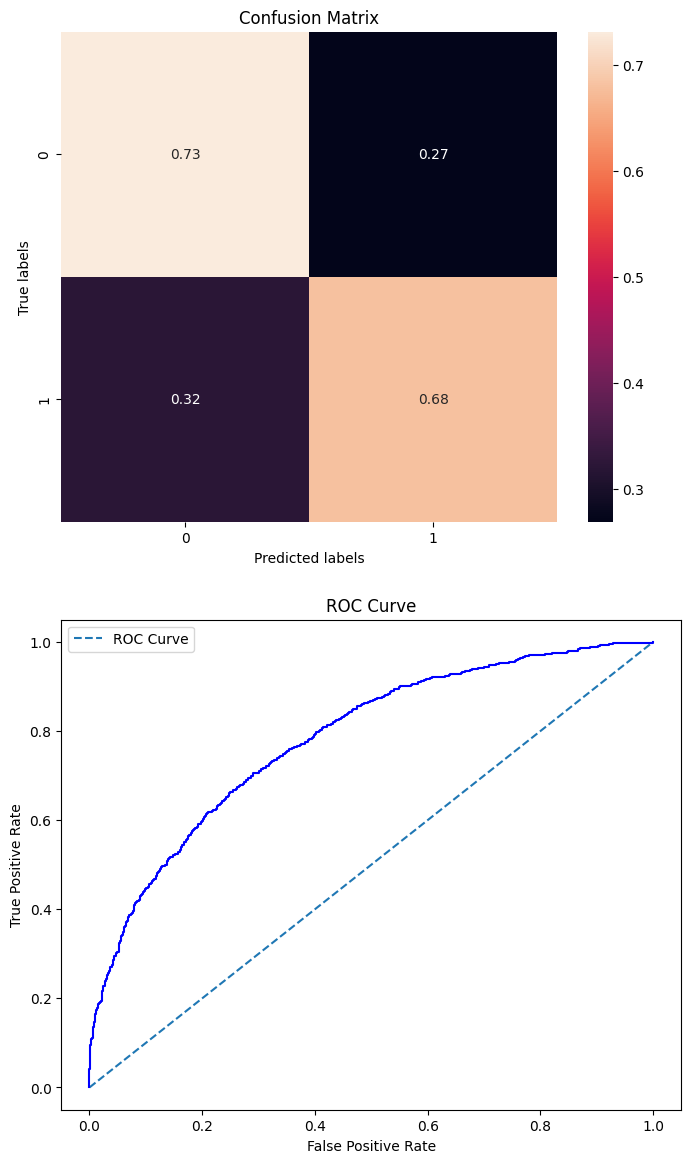

In [835]:
Logistic_RV=model_eval("Logistic_Regression_Hyperparameter_Tuning",best_log_cv,X_train_res,X_test,y_train_res,y_test)

In [836]:
Logistic_RV

('Logistic_Regression_Hyperparameter_Tuning',
 LogisticRegression(C=0.01, max_iter=150, solver='liblinear'),
 0.7330799184127573,
 0.7200686106346483,
 0.7330799184127573,
 0.7200686106346483,
 0.7330799264266593,
 0.7880211201852331,
 0.7330799161184034,
 0.7406412306539248,
 0.8029149529358455,
 0.7820079600112129)

In [837]:
metrics_A.loc[1]=list(Logistic_RV)
metrics_A

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.732987   
1  LogisticRegression(C=0.01, max_iter=150, solve...        0.733080   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.723499      0.732987     0.723499         0.733003        0.787167   
1       0.720069      0.733080     0.720069         0.733080        0.788021   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.732983  0.743232   0.802930  0.782258  
1  0.733080  0.740641   0.802915  0.782008

Desicion Tree

In [838]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(X_train_res, y_train_res)
depth=DT.tree_.max_depth
print(depth)
leaf_nodes=DT.get_n_leaves()
print(leaf_nodes)

27
1286


              precision    recall  f1-score   support

           0       0.88      0.83      0.85      2284
           1       0.48      0.58      0.53       631

    accuracy                           0.77      2915
   macro avg       0.68      0.70      0.69      2915
weighted avg       0.79      0.77      0.78      2915



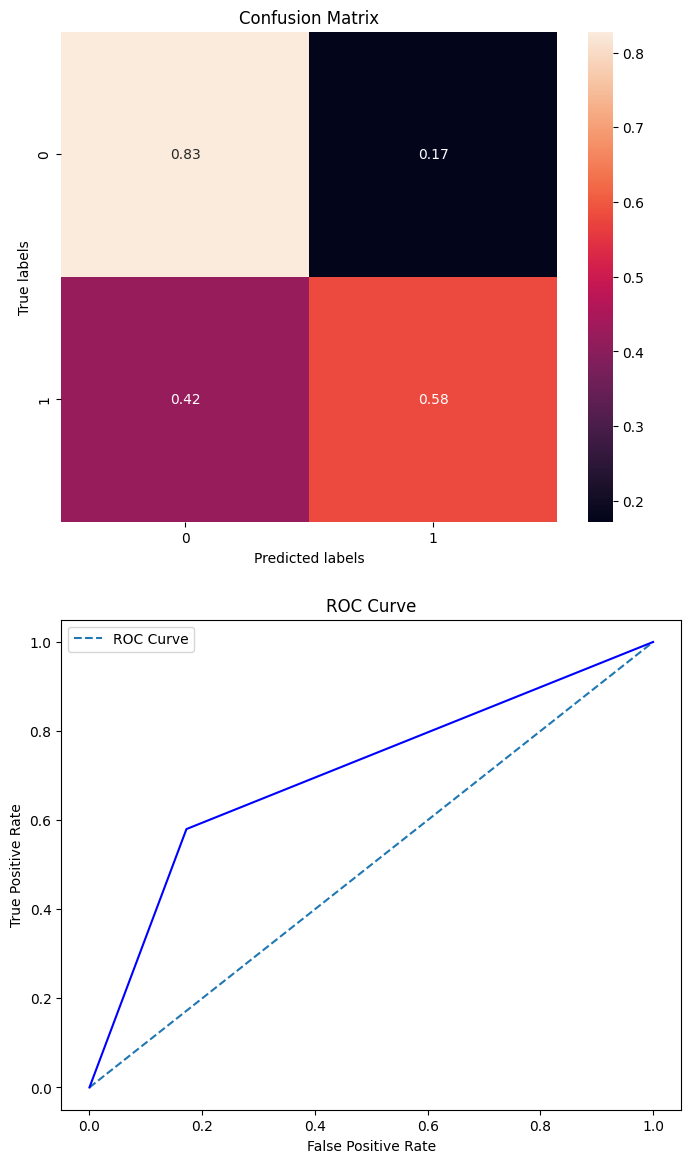

In [839]:
Des_tree=model_eval("Desicion Tree",DT,X_train_res,X_test,y_train_res,y_test)

In [840]:
Des_tree

('Desicion Tree',
 DecisionTreeClassifier(),
 1.0,
 0.7742710120068611,
 1.0,
 0.7742710120068611,
 1.0,
 0.7916102371361633,
 1.0,
 0.7814105379735893,
 1.0,
 0.7039825729043216)

All the metrices for training are coming 1.0 and we can see difference between training and testing metrics, so it might be overfitting

In [841]:
metrics_A.loc[2]=list(Des_tree)
metrics_A

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.732987   
1  LogisticRegression(C=0.01, max_iter=150, solve...        0.733080   
2                           DecisionTreeClassifier()        1.000000   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.723499      0.732987     0.723499         0.733003        0.787167   
1       0.720069      0.733080     0.720069         0.733080        0.788021   
2       0.774271      1.000000     0.774271         1.000000        0.791610   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.732983  0.743232   0.802930  0.782258  
1  0.733080  0.740641   0.802915  0.782008  
2  1.000000  0.781411   1.000000  0.703983

Desicion Tree with Hyperparameter Tuning

In [842]:
DT_HT = DecisionTreeClassifier()
param_list={
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":["best", "random"],
    "max_depth":[5,10,15,20,25,30],
    "min_samples_split":[10,20,30,50,70,100],
    "min_samples_leaf":[5,10,15,20],
    "max_features":["auto", "sqrt", "log2"],
    "max_leaf_nodes":[100,200,400,500,700,900,1000,1200]
}

In [843]:
DT_CV = RandomizedSearchCV(DT_HT,param_list,n_iter=10)
DT_CV.fit(X_train_res,y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [100, 200, 400, 500,
                                                           700, 900, 1000,
                                                           1200],
                                        'min_samples_leaf': [5, 10, 15, 20],
                                        'min_samples_split': [10, 20, 30, 50,
                                                              70, 100],
                                        'splitter': ['best', 'random']})

In [844]:
print("best parameters: ",DT_CV.best_params_)
best_DT_cv=DT_CV.best_estimator_

best parameters:  {'splitter': 'best', 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_leaf_nodes': 400, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'log_loss'}


              precision    recall  f1-score   support

           0       0.90      0.80      0.85      2284
           1       0.49      0.69      0.57       631

    accuracy                           0.78      2915
   macro avg       0.70      0.74      0.71      2915
weighted avg       0.81      0.78      0.79      2915



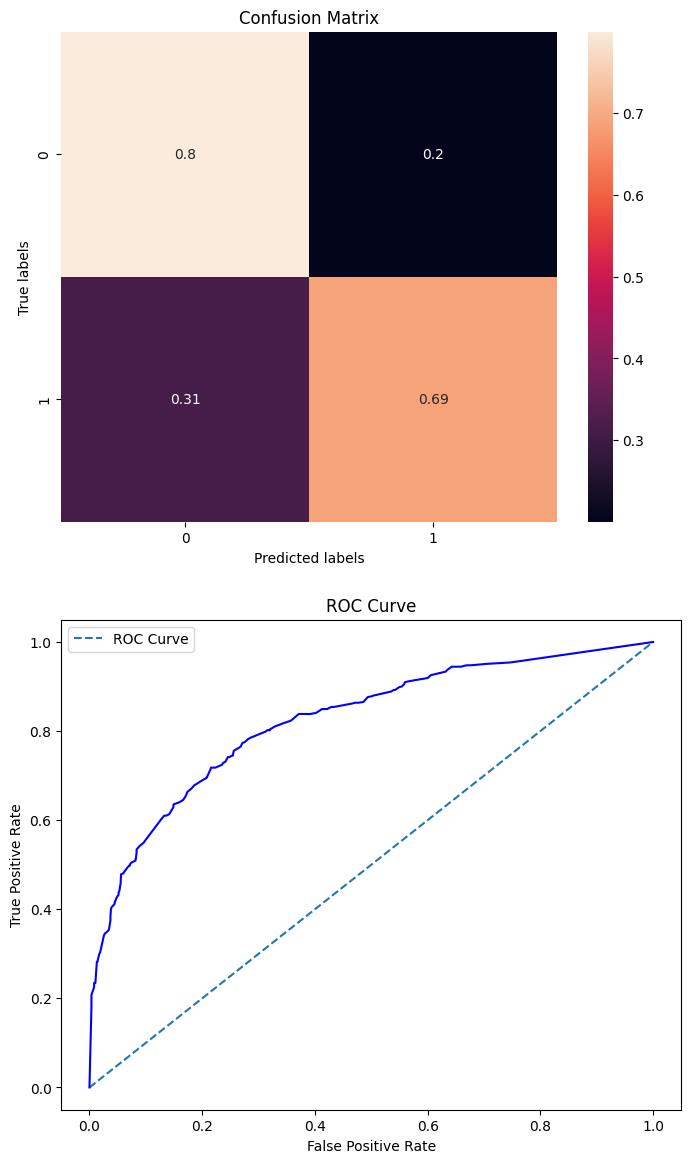

In [845]:
Desicion_RV=model_eval("Desicion_Tree_Hyperparameter_Tuning",best_DT_cv,X_train_res,X_test,y_train_res,y_test)

In [846]:
Desicion_RV

('Desicion_Tree_Hyperparameter_Tuning',
 DecisionTreeClassifier(criterion='log_loss', max_depth=10, max_features='log2',
                        max_leaf_nodes=400, min_samples_leaf=15,
                        min_samples_split=20),
 0.8519376970146486,
 0.7759862778730703,
 0.8519376970146486,
 0.7759862778730703,
 0.8520469383352759,
 0.813184018056136,
 0.8519262100688746,
 0.788393643764382,
 0.936868926071111,
 0.8221913760994279)

In [847]:
metrics_A.loc[3]=list(Desicion_RV)
metrics_A

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.732987   
1  LogisticRegression(C=0.01, max_iter=150, solve...        0.733080   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='log_loss', m...        0.851938   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.723499      0.732987     0.723499         0.733003        0.787167   
1       0.720069      0.733080     0.720069         0.733080        0.788021   
2       0.774271      1.000000     0.774271         1.000000        0.791610   
3       0.775986      0.851938     0.775986         0.852047        0.813184   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.732983  0.743232   0.802930  0.782258  
1  0.733080  0.740641   0.802915  0.782008  
2  1.000000  0.781411   1.000000  0.703983  
3  0.851926  0.788394   0.936869  0.822191

Random Forest Classifier

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2284
           1       0.62      0.60      0.61       631

    accuracy                           0.83      2915
   macro avg       0.76      0.75      0.75      2915
weighted avg       0.83      0.83      0.83      2915



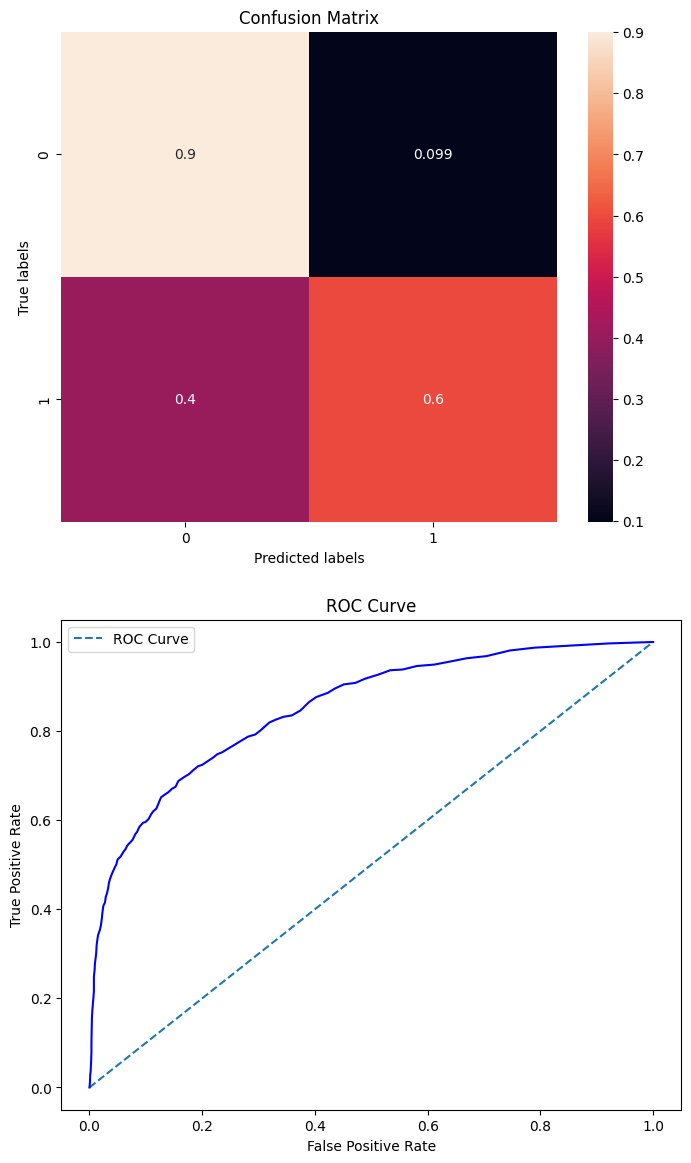

In [848]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier().fit(X_train_res, y_train_res)
Random_forest=model_eval("Random Forest",RF,X_train_res,X_test,y_train_res,y_test)

In [849]:
Random_forest

('Random Forest',
 RandomForestClassifier(),
 1.0,
 0.8346483704974271,
 1.0,
 0.8346483704974271,
 1.0,
 0.8320918027827433,
 1.0,
 0.8332761021558794,
 1.0,
 0.8495834038762035)

Almost all the metrices for training are coming to be 1.0 and we can see difference between training and testing metrics, so it might be overfitting

In [850]:
metrics_A.loc[4]=list(Random_forest)
metrics_A

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.732987   
1  LogisticRegression(C=0.01, max_iter=150, solve...        0.733080   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='log_loss', m...        0.851938   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.723499      0.732987     0.723499         0.733003        0.787167   
1       0.720069      0.733080     0.720069         0.733080        0.788021   
2       0.774271      1.000000     0.774271         1.000000        0.791610   
3       0.775986      0.851938     0.775986         0.852047        0.813184   
4       0.834648      1.000000     0.834648         1.000000        0.832092   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.732983  0.743232   0.802930  0.782258  
1  0.733080  0.740641   0.802915  0.782008  
2  1.000000  0.781411   1.000000  0.703983  
3  0.851926  0.788394   0.936869  0.822191  
4  1.000000  0.833276   1.000000  0.849583

Random Forest Hyperparameter Tuning

In [851]:
param_list={
    "n_estimators":[10,20,30,40,50,60,70,80,90,100],
    "max_features":["sqrt", "log2", None],
    "max_depth":[5,10,15,20,25],
    "min_samples_split":[10,20,30,40,50,60,70,80,90,100],
    "min_samples_leaf":[10,20,30,40,50,60,70,80,90,100],
    "bootstrap":[False,True]
}
RF_HT=RandomForestClassifier()

In [852]:
RF_CV = RandomizedSearchCV(RF_HT,param_list,n_iter=10)
RF_CV.fit(X_train_res,y_train_res)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [10, 20, 30, 40, 50,
                                                             60, 70, 80, 90,
                                                             100],
                                        'min_samples_split': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              90, 100],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [853]:
print("best parameters: ",RF_CV.best_params_)
best_RF_cv=RF_CV.best_estimator_

best parameters:  {'n_estimators': 80, 'min_samples_split': 30, 'min_samples_leaf': 40, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2284
           1       0.54      0.69      0.60       631

    accuracy                           0.80      2915
   macro avg       0.72      0.76      0.74      2915
weighted avg       0.83      0.80      0.81      2915



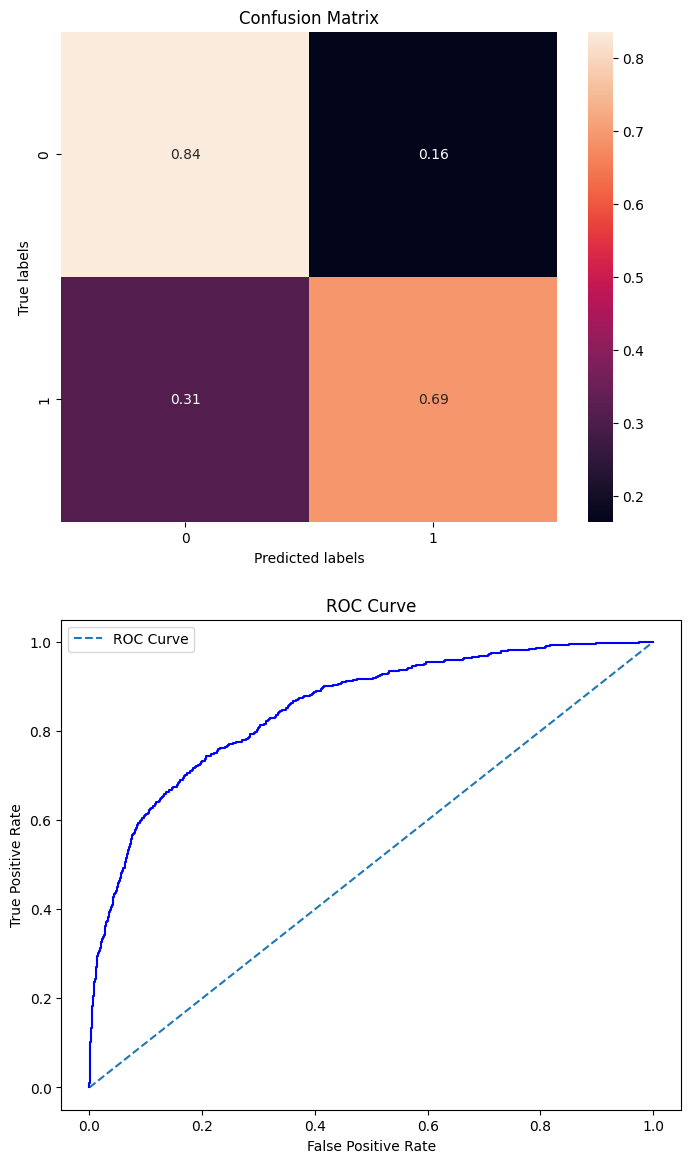

In [854]:
Random_RV=model_eval("Random_Forest_Hyperparameter_Tuning",best_RF_cv,X_train_res,X_test,y_train_res,y_test)

In [855]:
Random_RV

('Random_Forest_Hyperparameter_Tuning',
 RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=40,
                        min_samples_split=30, n_estimators=80),
 0.8653810495086223,
 0.8041166380789022,
 0.8653810495086223,
 0.8041166380789022,
 0.8654053726375021,
 0.8268279200677354,
 0.8653788092510771,
 0.8122884526240081,
 0.9406895073033703,
 0.8503286141309627)

In [856]:
metrics_A.loc[5]=list(Random_RV)
metrics_A

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   
5        Random_Forest_Hyperparameter_Tuning   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.732987   
1  LogisticRegression(C=0.01, max_iter=150, solve...        0.733080   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='log_loss', m...        0.851938   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   
5  (DecisionTreeClassifier(max_depth=10, max_feat...        0.865381   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.723499      0.732987     0.723499         0.733003        0.787167   
1       0.720069      0.733080     0.720069         0.733080        0.788021   
2       0.774271      1.000000     0.774271         1.000000        0.791610   
3       0.775986      0.851938     0.775986         0.852047        0.813184   
4       0.834648      1.000000     0.834648         1.000000        0.832092   
5       0.804117      0.865381     0.804117         0.865405        0.826828   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.732983  0.743232   0.802930  0.782258  
1  0.733080  0.740641   0.802915  0.782008  
2  1.000000  0.781411   1.000000  0.703983  
3  0.851926  0.788394   0.936869  0.822191  
4  1.000000  0.833276   1.000000  0.849583  
5  0.865379  0.812288   0.940690  0.850329

Adaboost Algorithm

In [857]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators=80, random_state=0).fit(X_train_res, y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.85      0.88      2284
           1       0.55      0.69      0.61       631

    accuracy                           0.81      2915
   macro avg       0.73      0.77      0.74      2915
weighted avg       0.83      0.81      0.82      2915



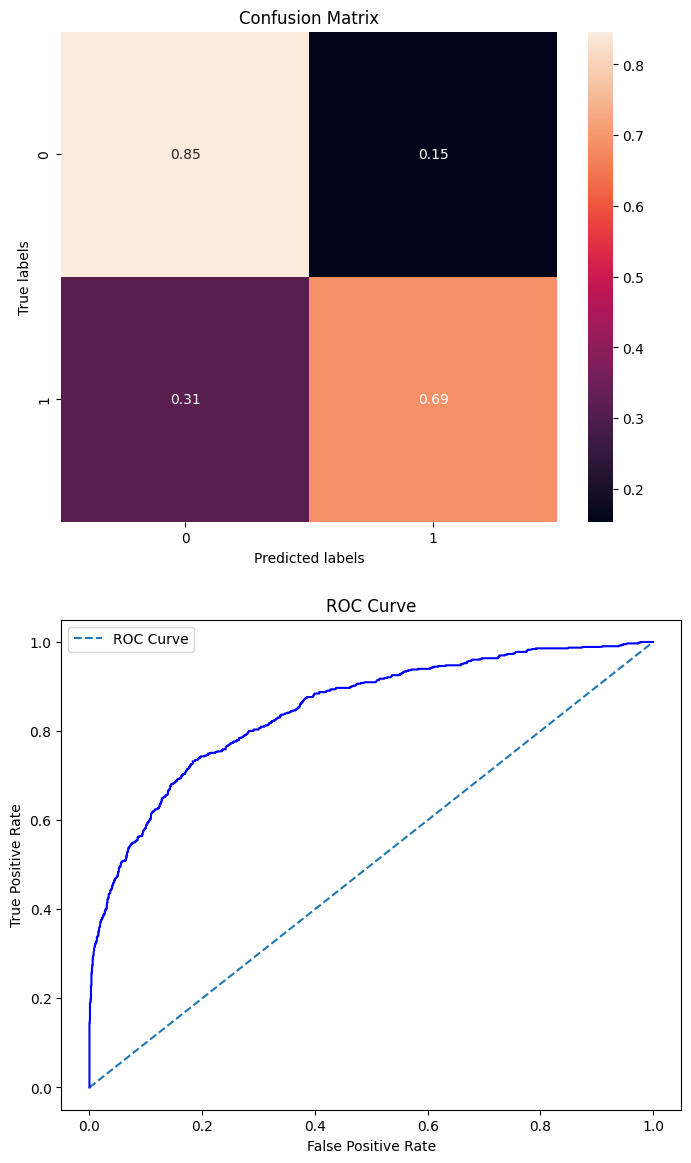

In [858]:
Ada_boost=model_eval("Ada_Boost",Ada,X_train_res,X_test,y_train_res,y_test)

In [859]:
Ada_boost

('Ada_Boost',
 AdaBoostClassifier(n_estimators=80, random_state=0),
 0.8495271648433154,
 0.8120068610634649,
 0.8495271648433154,
 0.8120068610634649,
 0.8496267114703698,
 0.8307428494812527,
 0.8495164533265697,
 0.818950206478116,
 0.9250615853166069,
 0.8477862953475013)

In [860]:
metrics_A.loc[6]=list(Ada_boost)
metrics_A

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   
5        Random_Forest_Hyperparameter_Tuning   
6                                  Ada_Boost   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.732987   
1  LogisticRegression(C=0.01, max_iter=150, solve...        0.733080   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='log_loss', m...        0.851938   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   
5  (DecisionTreeClassifier(max_depth=10, max_feat...        0.865381   
6  (DecisionTreeClassifier(max_depth=1, random_st...        0.849527   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.723499      0.732987     0.723499         0.733003        0.787167   
1       0.720069      0.733080     0.720069         0.733080        0.788021   
2       0.774271      1.000000     0.774271         1.000000        0.791610   
3       0.775986      0.851938     0.775986         0.852047        0.813184   
4       0.834648      1.000000     0.834648         1.000000        0.832092   
5       0.804117      0.865381     0.804117         0.865405        0.826828   
6       0.812007      0.849527     0.812007         0.849627        0.830743   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.732983  0.743232   0.802930  0.782258  
1  0.733080  0.740641   0.802915  0.782008  
2  1.000000  0.781411   1.000000  0.703983  
3  0.851926  0.788394   0.936869  0.822191  
4  1.000000  0.833276   1.000000  0.849583  
5  0.865379  0.812288   0.940690  0.850329  
6  0.849516  0.818950   0.925062  0.847786

Support Vector Machine Classification

In [861]:
from sklearn.svm import SVC
SVM=SVC(probability=True).fit(X_train_res, y_train_res)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      2284
           1       0.49      0.71      0.58       631

    accuracy                           0.78      2915
   macro avg       0.70      0.75      0.71      2915
weighted avg       0.82      0.78      0.79      2915



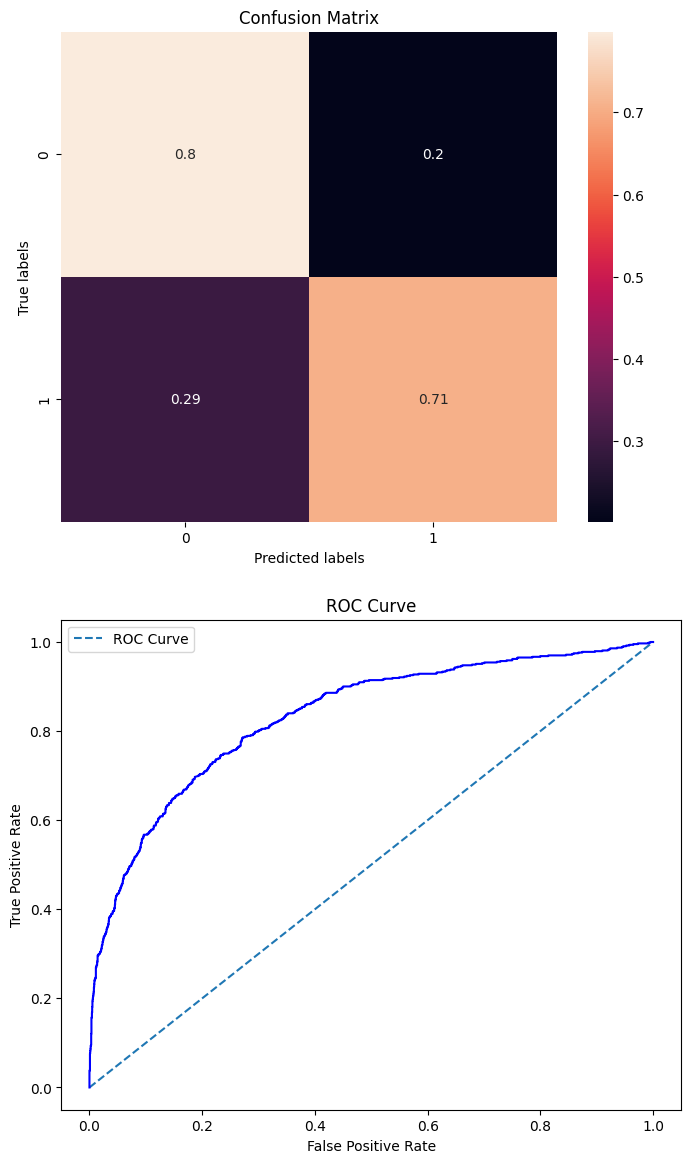

In [862]:
support=model_eval("SVM",SVM,X_train_res,X_test,y_train_res,y_test)

In [863]:
support

('SVM',
 SVC(probability=True),
 0.8435008344149824,
 0.7780445969125215,
 0.8435008344149824,
 0.7780445969125215,
 0.8436709893402656,
 0.8173131485409851,
 0.8434814609435921,
 0.7907917404748199,
 0.9180443817244054,
 0.8318124984388052)

In [864]:
metrics_A.loc[7]=list(support)
metrics_A

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   
5        Random_Forest_Hyperparameter_Tuning   
6                                  Ada_Boost   
7                                        SVM   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.732987   
1  LogisticRegression(C=0.01, max_iter=150, solve...        0.733080   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='log_loss', m...        0.851938   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   
5  (DecisionTreeClassifier(max_depth=10, max_feat...        0.865381   
6  (DecisionTreeClassifier(max_depth=1, random_st...        0.849527   
7                              SVC(probability=True)        0.843501   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.723499      0.732987     0.723499         0.733003        0.787167   
1       0.720069      0.733080     0.720069         0.733080        0.788021   
2       0.774271      1.000000     0.774271         1.000000        0.791610   
3       0.775986      0.851938     0.775986         0.852047        0.813184   
4       0.834648      1.000000     0.834648         1.000000        0.832092   
5       0.804117      0.865381     0.804117         0.865405        0.826828   
6       0.812007      0.849527     0.812007         0.849627        0.830743   
7       0.778045      0.843501     0.778045         0.843671        0.817313   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.732983  0.743232   0.802930  0.782258  
1  0.733080  0.740641   0.802915  0.782008  
2  1.000000  0.781411   1.000000  0.703983  
3  0.851926  0.788394   0.936869  0.822191  
4  1.000000  0.833276   1.000000  0.849583  
5  0.865379  0.812288   0.940690  0.850329  
6  0.849516  0.818950   0.925062  0.847786  
7  0.843481  0.790792   0.918044  0.831812

SVM Hyperparameter Tuning

In [865]:
param_list={
    "kernel":['linear','poly','rbf','sigmoid'],
    "C":[0.00001,0.0001,0.001,0.01,0.1,1,10],
    "gamma":['scale','auto'],
    "degree":[2,3,4,5],
}
SVM_HT=SVC(probability=True)

In [866]:
SVM_CV = RandomizedSearchCV(SVM_HT,param_list,n_iter=10)
SVM_CV.fit(X_train_res,y_train_res)

RandomizedSearchCV(estimator=SVC(probability=True),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10],
                                        'degree': [2, 3, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [867]:
print("best parameters: ",SVM_CV.best_params_)
best_SVM_cv=SVM_CV.best_estimator_

best parameters:  {'kernel': 'poly', 'gamma': 'scale', 'degree': 4, 'C': 10}


              precision    recall  f1-score   support

           0       0.89      0.81      0.85      2284
           1       0.49      0.65      0.56       631

    accuracy                           0.78      2915
   macro avg       0.69      0.73      0.70      2915
weighted avg       0.80      0.78      0.79      2915



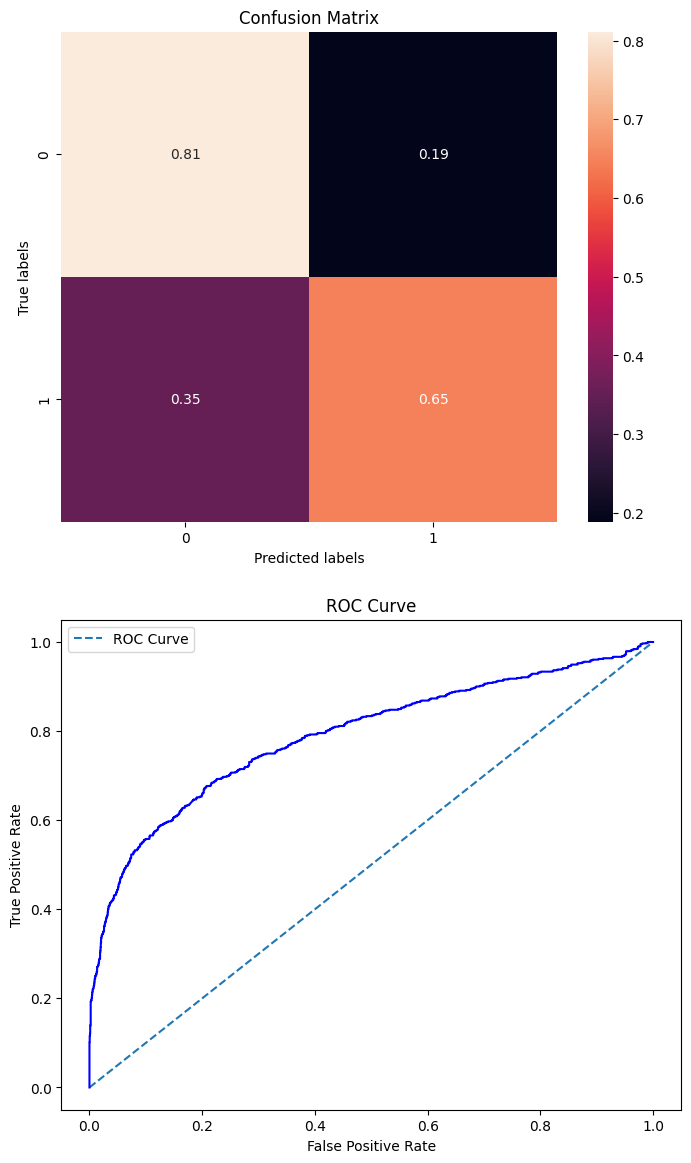

In [868]:
Random_SVM=model_eval("SVM_Hyperparameter_Tuning",best_SVM_cv,X_train_res,X_test,y_train_res,y_test)

In [869]:
Random_SVM

('SVM_Hyperparameter_Tuning',
 SVC(C=10, degree=4, kernel='poly', probability=True),
 0.8564806230298535,
 0.7756432246998285,
 0.8564806230298535,
 0.7756432246998285,
 0.8565983756749177,
 0.8046339779986775,
 0.8564687741386026,
 0.786164455490601,
 0.9250087907802552,
 0.7893417586962012)

In [870]:
metrics_A.loc[8]=list(Random_SVM)
metrics_A

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   
5        Random_Forest_Hyperparameter_Tuning   
6                                  Ada_Boost   
7                                        SVM   
8                  SVM_Hyperparameter_Tuning   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.732987   
1  LogisticRegression(C=0.01, max_iter=150, solve...        0.733080   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='log_loss', m...        0.851938   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   
5  (DecisionTreeClassifier(max_depth=10, max_feat...        0.865381   
6  (DecisionTreeClassifier(max_depth=1, random_st...        0.849527   
7                              SVC(probability=True)        0.843501   
8  SVC(C=10, degree=4, kernel='poly', probability...        0.856481   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.723499      0.732987     0.723499         0.733003        0.787167   
1       0.720069      0.733080     0.720069         0.733080        0.788021   
2       0.774271      1.000000     0.774271         1.000000        0.791610   
3       0.775986      0.851938     0.775986         0.852047        0.813184   
4       0.834648      1.000000     0.834648         1.000000        0.832092   
5       0.804117      0.865381     0.804117         0.865405        0.826828   
6       0.812007      0.849527     0.812007         0.849627        0.830743   
7       0.778045      0.843501     0.778045         0.843671        0.817313   
8       0.775643      0.856481     0.775643         0.856598        0.804634   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.732983  0.743232   0.802930  0.782258  
1  0.733080  0.740641   0.802915  0.782008  
2  1.000000  0.781411   1.000000  0.703983  
3  0.851926  0.788394   0.936869  0.822191  
4  1.000000  0.833276   1.000000  0.849583  
5  0.865379  0.812288   0.940690  0.850329  
6  0.849516  0.818950   0.925062  0.847786  
7  0.843481  0.790792   0.918044  0.831812  
8  0.856469  0.786164   0.925009  0.789342

# SECOND PART GOING ON (With outliers,Balanced)

Label Encoding

In [871]:
df2 = df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df2[col]=le.fit_transform(df2[col])

In [872]:
X=df2.drop(columns="Exited")
y=df2["Exited"]

# Data Spilitting

In [873]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(7000, 10)
(3000, 10)


# Data Scaling

In [874]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Handling Imbalance Dataset

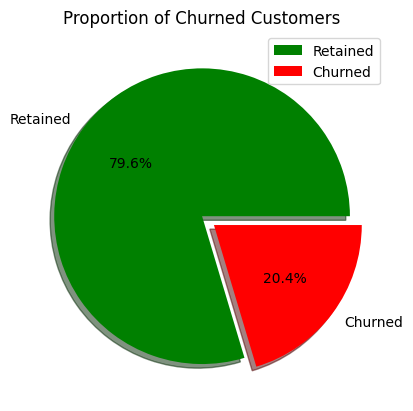

In [875]:
plt.pie(df2['Exited'].value_counts(),autopct='%1.1f%%',colors=['green','red'],labels=['Retained', 'Churned'],explode=(0,0.1),shadow=True)
plt.title('Proportion of Churned Customers')
plt.legend()
plt.show()

In [876]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_train_res))

Original dataset shape 7000
Resampled dataset shape 11094


In [877]:
dd=pd.DataFrame(y_train_res)
dd["Exited"].value_counts()

Exited
1    5547
0    5547
Name: count, dtype: int64

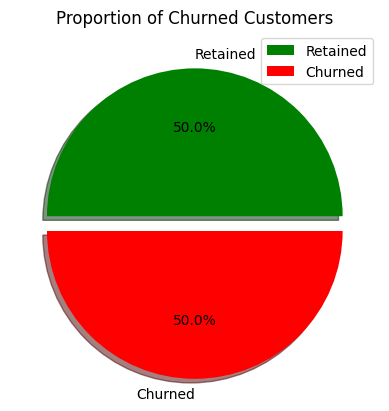

In [878]:
plt.pie(dd['Exited'].value_counts(),autopct='%1.1f%%',colors=['green','red'],labels=['Retained', 'Churned'],explode=(0,0.1),shadow=True)
plt.title('Proportion of Churned Customers')
plt.legend()
plt.show()

# Now doing model training on dataframe(without outliers ,scaled, balanced dataset)

**Model** **Implemetation**

A)This is for dataset which is with outliers, scaled and balanced

In [884]:
metrics_B=pd.DataFrame(columns=["model_name","model","Train_Accuracy","Test_Accuracy","Train_Recall","Test_Recall","Train_Precision","Test_Precision","Train_F1","Test_F1","Train_AUC","Test_AUC"])

# Logistic Regression

In [885]:
from sklearn.linear_model import LogisticRegression
L_clf = LogisticRegression(random_state=0).fit(X_train_res, y_train_res)

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      2416
           1       0.36      0.68      0.47       584

    accuracy                           0.70      3000
   macro avg       0.63      0.70      0.63      3000
weighted avg       0.80      0.70      0.73      3000



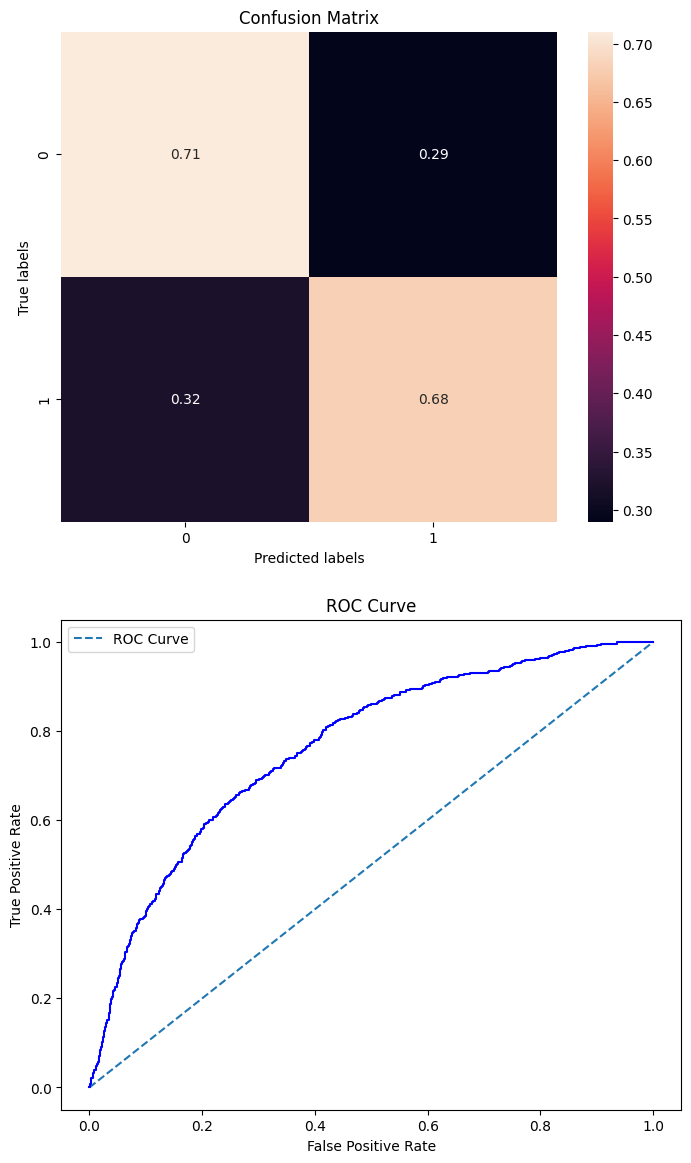

In [886]:
logistic=model_eval("Logistic_Regression",L_clf,X_train_res,X_test,y_train_res,y_test)

In [887]:
logi=logistic
print(logi)

('Logistic_Regression', LogisticRegression(random_state=0), 0.7056066342166937, 0.7043333333333334, 0.7056066342166937, 0.7043333333333334, 0.7056195718093053, 0.7966456354078297, 0.7056020033329298, 0.7318891704070165, 0.7694159443617807, 0.7638666027850857)


In [888]:
metrics_B.loc[0]=list(logistic)
metrics_B

model_name                               model  Train_Accuracy  \
0  Logistic_Regression  LogisticRegression(random_state=0)        0.705607   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333          0.70562        0.796646   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867

Logistic Regression with Hyperparameter Tuning

In [889]:
from sklearn.model_selection import RandomizedSearchCV
param_list={
    "C":[0.01,0.1,1,10],
    "max_iter":[20,50,100,150],
    "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}

In [890]:
LHT_clf = LogisticRegression()
log_CV = RandomizedSearchCV(LHT_clf,param_list,n_iter=20)
log_CV.fit(X_train_res,y_train_res)

RandomizedSearchCV(estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'max_iter': [20, 50, 100, 150],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [891]:
print("best parameters: ",log_CV.best_params_)
best_log_cv=log_CV.best_estimator_

best parameters:  {'solver': 'liblinear', 'max_iter': 150, 'C': 1}


              precision    recall  f1-score   support

           0       0.90      0.71      0.79      2416
           1       0.36      0.68      0.47       584

    accuracy                           0.70      3000
   macro avg       0.63      0.69      0.63      3000
weighted avg       0.80      0.70      0.73      3000



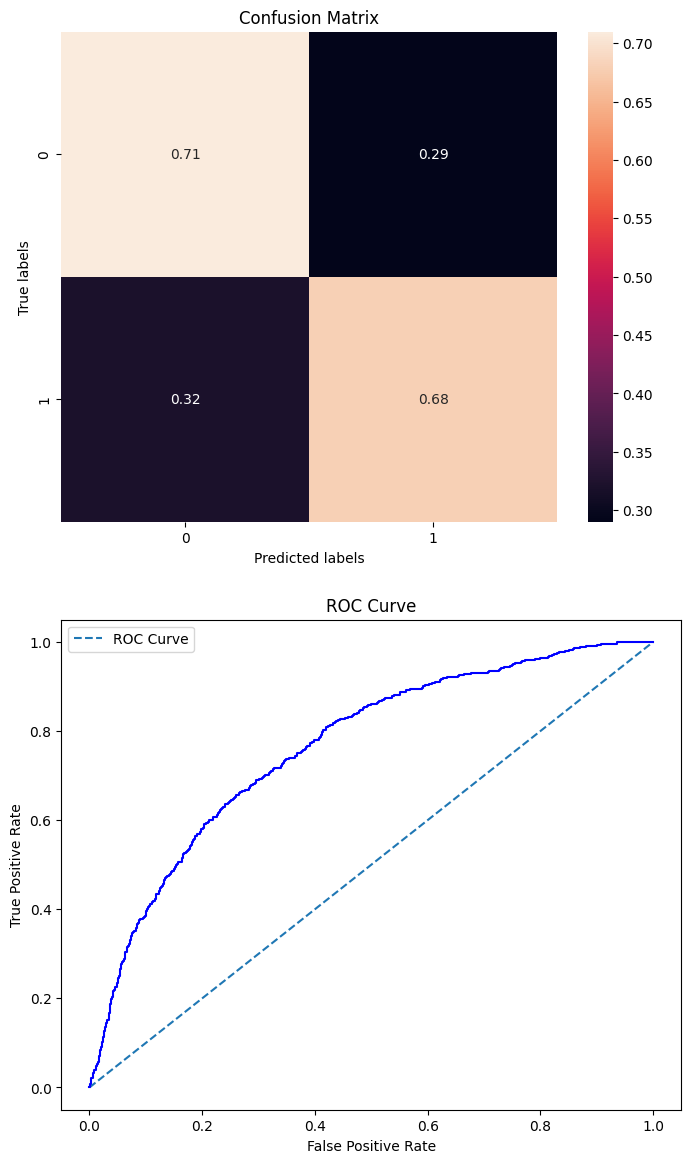

In [892]:
Logistic_RV=model_eval("Logistic_Regression_Hyperparameter_Tuning",best_log_cv,X_train_res,X_test,y_train_res,y_test)

In [893]:
Logistic_RV

('Logistic_Regression_Hyperparameter_Tuning',
 LogisticRegression(C=1, max_iter=150, solver='liblinear'),
 0.7057869118442401,
 0.704,
 0.7057869118442401,
 0.704,
 0.7057987102926486,
 0.7965398669600976,
 0.7057826949717324,
 0.7316096951125146,
 0.7694173093627463,
 0.7638743989839427)

In [894]:
metrics_B.loc[1]=list(Logistic_RV)
metrics_B

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=1, max_iter=150, solver='...        0.705787   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333         0.705620        0.796646   
1       0.704000      0.705787     0.704000         0.705799        0.796540   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867  
1  0.705783  0.731610   0.769417  0.763874

Desicion Tree

In [895]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(X_train_res, y_train_res)
depth=DT.tree_.max_depth
print(depth)
leaf_nodes=DT.get_n_leaves()
print(leaf_nodes)

26
1323


              precision    recall  f1-score   support

           0       0.88      0.84      0.86      2416
           1       0.44      0.53      0.48       584

    accuracy                           0.78      3000
   macro avg       0.66      0.68      0.67      3000
weighted avg       0.79      0.78      0.78      3000



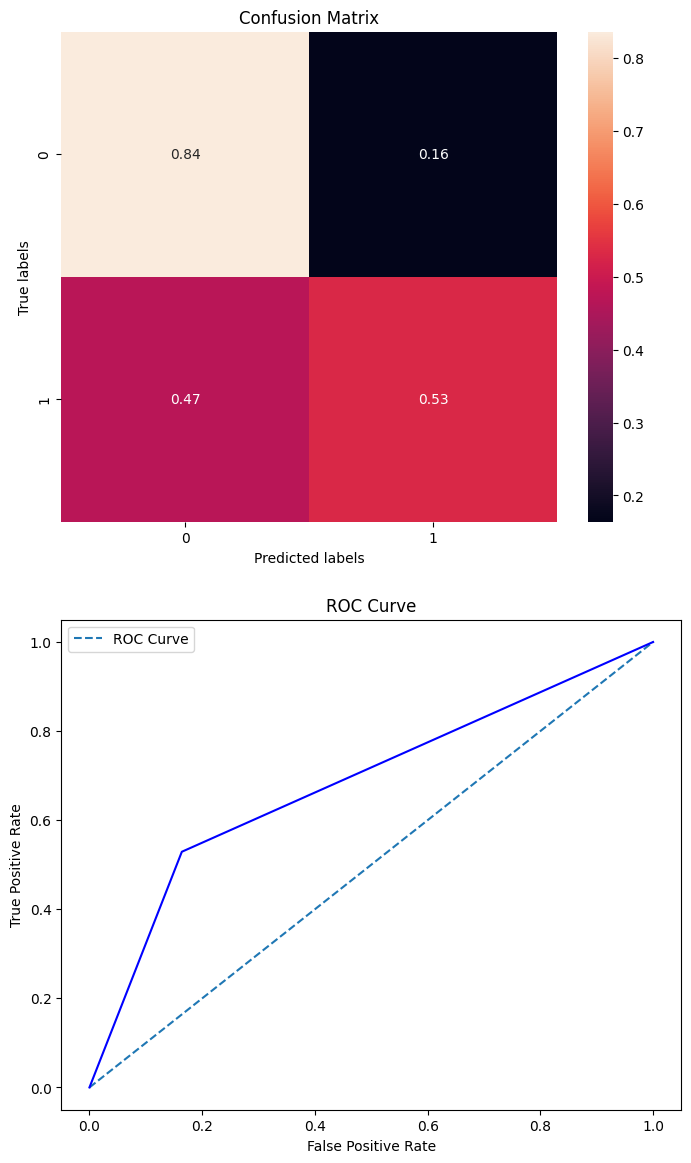

In [896]:
Des_tree=model_eval("Desicion Tree",DT,X_train_res,X_test,y_train_res,y_test)

In [897]:
Des_tree

('Desicion Tree',
 DecisionTreeClassifier(),
 1.0,
 0.7763333333333333,
 1.0,
 0.7763333333333333,
 1.0,
 0.7941556822571424,
 1.0,
 0.7839588736878849,
 1.0,
 0.682601152136442)

All the metrices for training are coming 1.0 , so it might be overfitting

In [898]:
metrics_B.loc[2]=list(Des_tree)
metrics_B

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=1, max_iter=150, solver='...        0.705787   
2                           DecisionTreeClassifier()        1.000000   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333         0.705620        0.796646   
1       0.704000      0.705787     0.704000         0.705799        0.796540   
2       0.776333      1.000000     0.776333         1.000000        0.794156   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867  
1  0.705783  0.731610   0.769417  0.763874  
2  1.000000  0.783959   1.000000  0.682601

Desicion Tree with Hyperparameter Tuning

In [899]:
DT_HT = DecisionTreeClassifier()
param_list={
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":["best", "random"],
    "max_depth":[5,10,15,20,25,30],
    "min_samples_split":[10,20,30,50,70,100],
    "min_samples_leaf":[5,10,15,20],
    "max_features":["auto", "sqrt", "log2"],
    "max_leaf_nodes":[100,200,400,500,700,900,1000,1200]
}

In [900]:
DT_CV = RandomizedSearchCV(DT_HT,param_list,n_iter=10)
DT_CV.fit(X_train_res,y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [100, 200, 400, 500,
                                                           700, 900, 1000,
                                                           1200],
                                        'min_samples_leaf': [5, 10, 15, 20],
                                        'min_samples_split': [10, 20, 30, 50,
                                                              70, 100],
                                        'splitter': ['best', 'random']})

In [901]:
print("best parameters: ",DT_CV.best_params_)
best_DT_cv=DT_CV.best_estimator_

best parameters:  {'splitter': 'best', 'min_samples_split': 50, 'min_samples_leaf': 10, 'max_leaf_nodes': 900, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}


              precision    recall  f1-score   support

           0       0.90      0.81      0.85      2416
           1       0.44      0.63      0.52       584

    accuracy                           0.77      3000
   macro avg       0.67      0.72      0.69      3000
weighted avg       0.81      0.77      0.79      3000



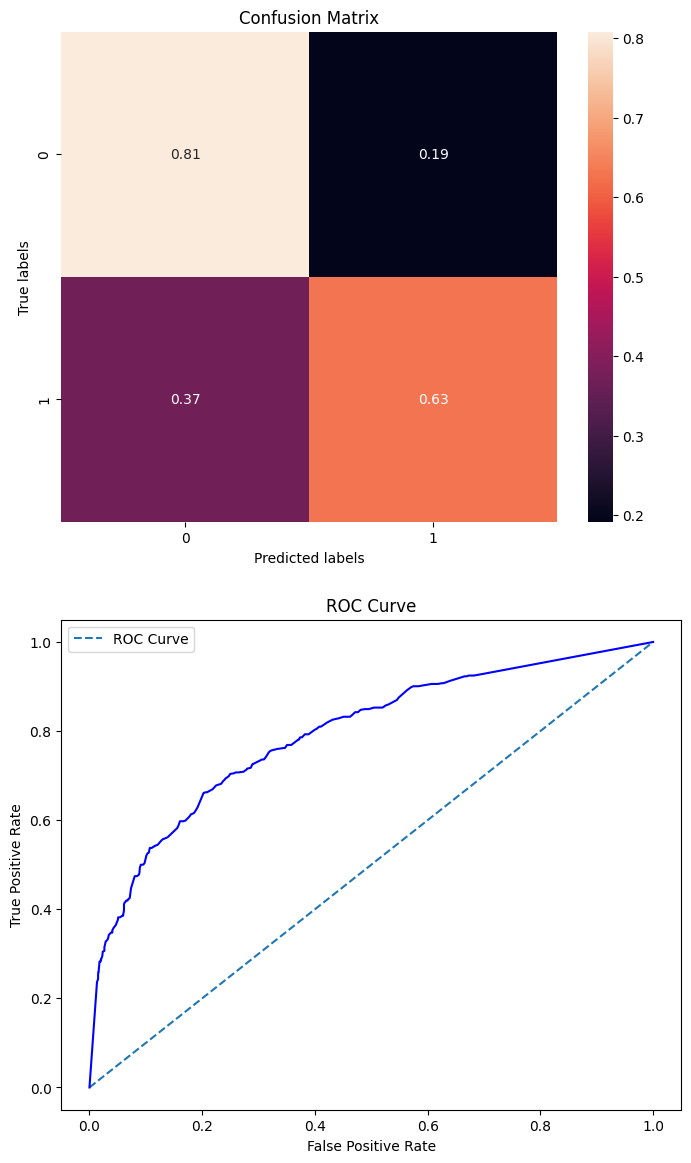

In [902]:
Desicion_RV=model_eval("Desicion_Tree_Hyperparameter_Tuning",best_DT_cv,X_train_res,X_test,y_train_res,y_test)

In [903]:
Desicion_RV

('Desicion_Tree_Hyperparameter_Tuning',
 DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='log2',
                        max_leaf_nodes=900, min_samples_leaf=10,
                        min_samples_split=50),
 0.8513610960879755,
 0.7733333333333333,
 0.8513610960879755,
 0.7733333333333333,
 0.8513636654365969,
 0.8108755020080323,
 0.8513608243567904,
 0.7869710759001887,
 0.9391128806723631,
 0.7917932958359793)

In [904]:
metrics_B.loc[3]=list(Desicion_RV)
metrics_B

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=1, max_iter=150, solver='...        0.705787   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='entropy', ma...        0.851361   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333         0.705620        0.796646   
1       0.704000      0.705787     0.704000         0.705799        0.796540   
2       0.776333      1.000000     0.776333         1.000000        0.794156   
3       0.773333      0.851361     0.773333         0.851364        0.810876   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867  
1  0.705783  0.731610   0.769417  0.763874  
2  1.000000  0.783959   1.000000  0.682601  
3  0.851361  0.786971   0.939113  0.791793

Random Forest Classifier

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2416
           1       0.61      0.60      0.60       584

    accuracy                           0.85      3000
   macro avg       0.76      0.75      0.75      3000
weighted avg       0.85      0.85      0.85      3000



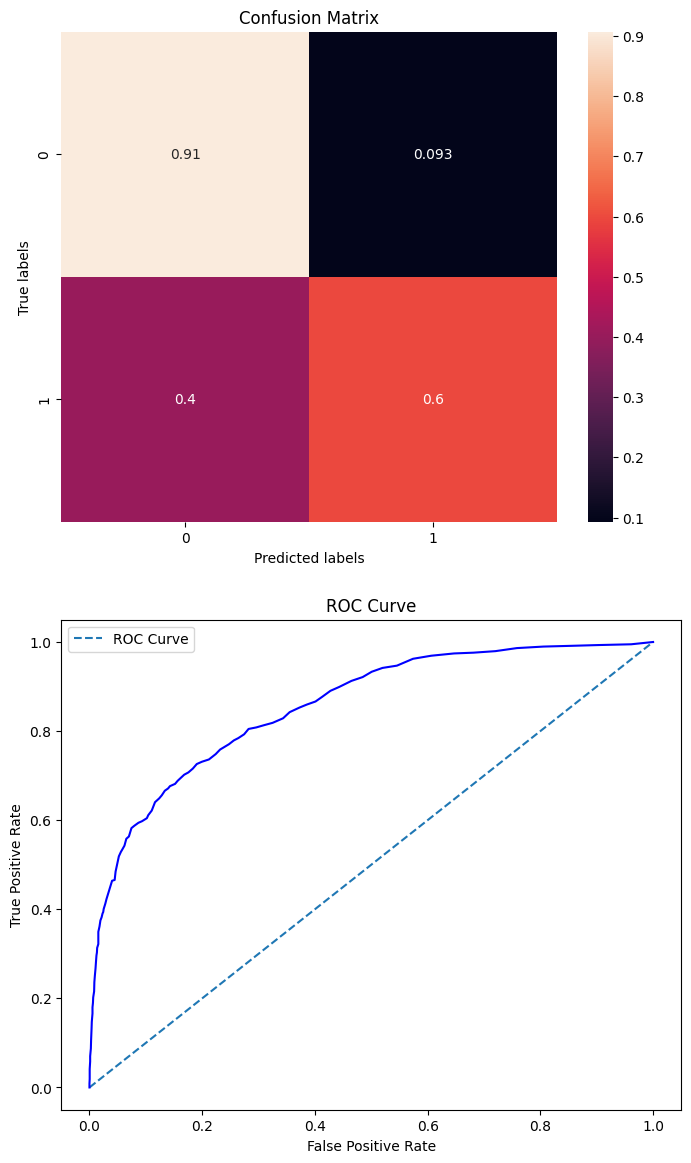

In [905]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier().fit(X_train_res, y_train_res)
Random_forest=model_eval("Random Forest",RF,X_train_res,X_test,y_train_res,y_test)

In [906]:
Random_forest

('Random Forest',
 RandomForestClassifier(),
 1.0,
 0.8466666666666667,
 1.0,
 0.8466666666666667,
 1.0,
 0.845682937361702,
 1.0,
 0.8461629424173484,
 1.0,
 0.854907778054976)

In [907]:
metrics_B.loc[4]=list(Random_forest)
metrics_B

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=1, max_iter=150, solver='...        0.705787   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='entropy', ma...        0.851361   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333         0.705620        0.796646   
1       0.704000      0.705787     0.704000         0.705799        0.796540   
2       0.776333      1.000000     0.776333         1.000000        0.794156   
3       0.773333      0.851361     0.773333         0.851364        0.810876   
4       0.846667      1.000000     0.846667         1.000000        0.845683   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867  
1  0.705783  0.731610   0.769417  0.763874  
2  1.000000  0.783959   1.000000  0.682601  
3  0.851361  0.786971   0.939113  0.791793  
4  1.000000  0.846163   1.000000  0.854908

Random Forest Hyperparameter Tuning

In [908]:
param_list={
    "n_estimators":[10,20,30,40,50,60,70,80,90,100],
    "max_features":["sqrt", "log2", None],
    "max_depth":[5,10,15,20,25],
    "min_samples_split":[10,20,30,40,50,60,70,80,90,100],
    "min_samples_leaf":[10,20,30,40,50,60,70,80,90,100],
    "bootstrap":[False,True]
}
RF_HT=RandomForestClassifier()

In [909]:
RF_CV = RandomizedSearchCV(RF_HT,param_list,n_iter=10)
RF_CV.fit(X_train_res,y_train_res)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [10, 20, 30, 40, 50,
                                                             60, 70, 80, 90,
                                                             100],
                                        'min_samples_split': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              90, 100],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [910]:
print("best parameters: ",RF_CV.best_params_)
best_RF_cv=RF_CV.best_estimator_

best parameters:  {'n_estimators': 60, 'min_samples_split': 40, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': False}


              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2416
           1       0.55      0.65      0.60       584

    accuracy                           0.83      3000
   macro avg       0.73      0.76      0.75      3000
weighted avg       0.84      0.83      0.83      3000



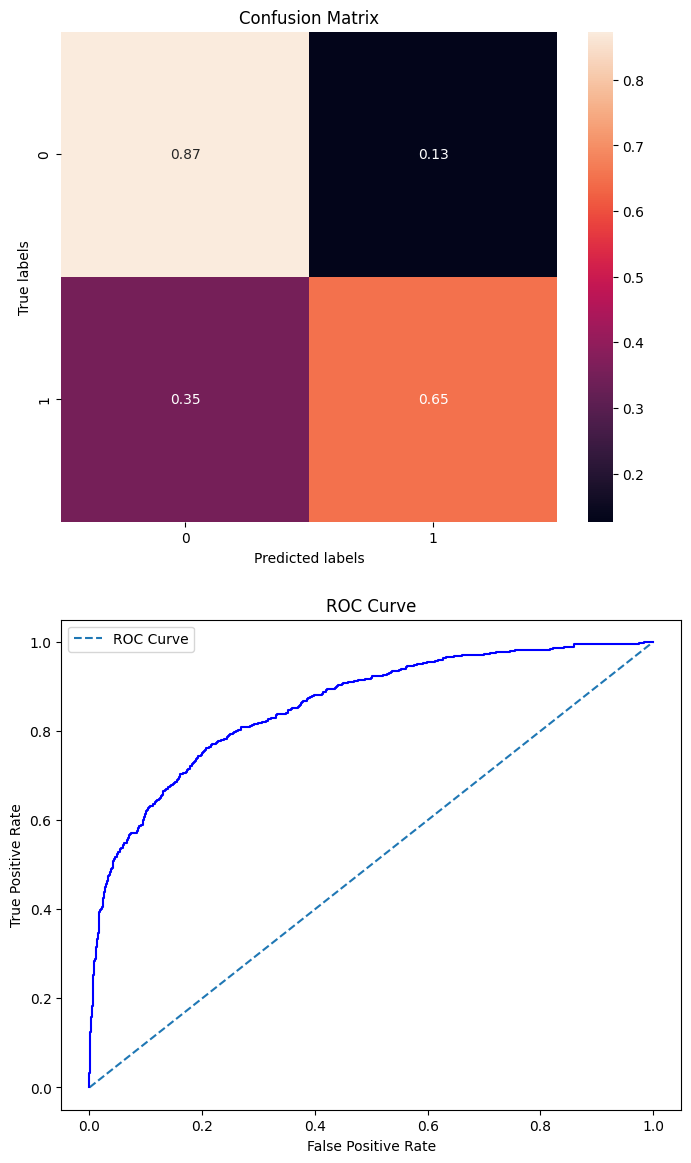

In [911]:
Random_RV=model_eval("Random_Forest_Hyperparameter_Tuning",best_RF_cv,X_train_res,X_test,y_train_res,y_test)

In [912]:
Random_RV

('Random_Forest_Hyperparameter_Tuning',
 RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_leaf=10,
                        min_samples_split=40, n_estimators=60),
 0.914007571660357,
 0.83,
 0.914007571660357,
 0.83,
 0.9140129538325646,
 0.8421687736707228,
 0.9140072921838588,
 0.8349937906810275,
 0.975360595067621,
 0.8567115349723304)

In [913]:
metrics_B.loc[5]=list(Random_RV)
metrics_B

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   
5        Random_Forest_Hyperparameter_Tuning   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=1, max_iter=150, solver='...        0.705787   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='entropy', ma...        0.851361   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   
5  (DecisionTreeClassifier(max_depth=15, max_feat...        0.914008   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333         0.705620        0.796646   
1       0.704000      0.705787     0.704000         0.705799        0.796540   
2       0.776333      1.000000     0.776333         1.000000        0.794156   
3       0.773333      0.851361     0.773333         0.851364        0.810876   
4       0.846667      1.000000     0.846667         1.000000        0.845683   
5       0.830000      0.914008     0.830000         0.914013        0.842169   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867  
1  0.705783  0.731610   0.769417  0.763874  
2  1.000000  0.783959   1.000000  0.682601  
3  0.851361  0.786971   0.939113  0.791793  
4  1.000000  0.846163   1.000000  0.854908  
5  0.914007  0.834994   0.975361  0.856712

Adaboost Algorithm

In [914]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators=80, random_state=0).fit(X_train_res, y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      0.85      0.88      2416
           1       0.53      0.69      0.60       584

    accuracy                           0.82      3000
   macro avg       0.72      0.77      0.74      3000
weighted avg       0.84      0.82      0.83      3000



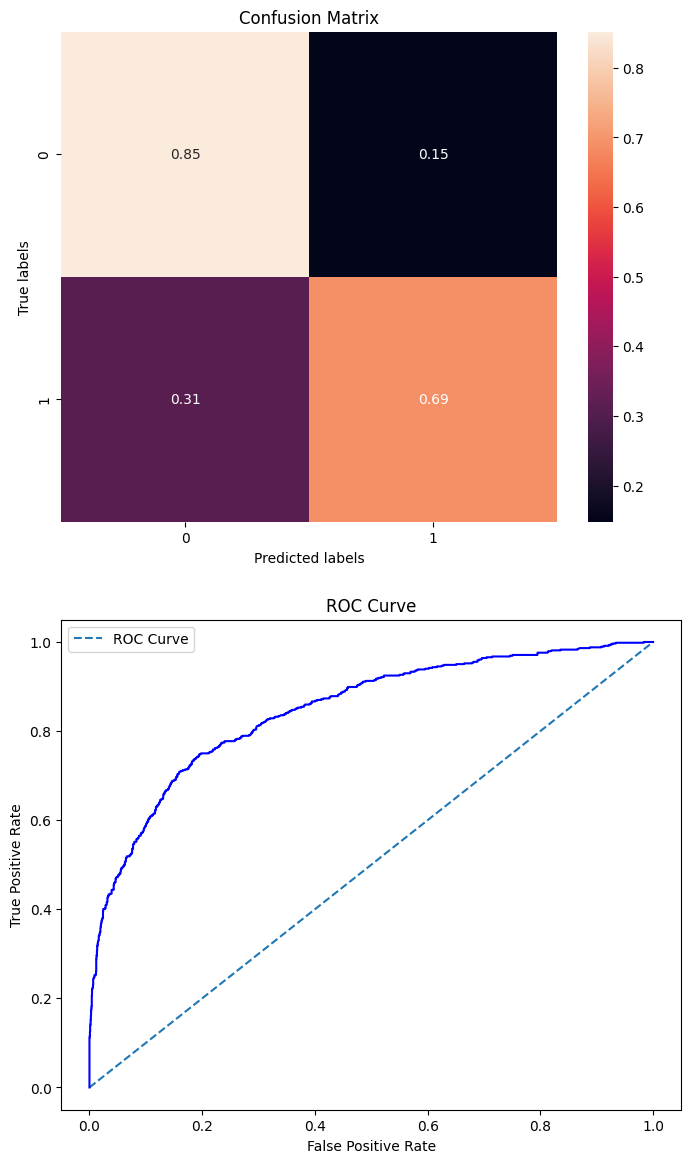

In [915]:
Ada_boost=model_eval("Ada_Boost",Ada,X_train_res,X_test,y_train_res,y_test)

In [916]:
Ada_boost

('Ada_Boost',
 AdaBoostClassifier(n_estimators=80, random_state=0),
 0.8425274923382008,
 0.82,
 0.8425274923382008,
 0.82,
 0.8425277706422115,
 0.8428684210526315,
 0.8425274603515686,
 0.8283836524300441,
 0.9204370999592482,
 0.8458900565862287)

In [917]:
metrics_B.loc[6]=list(Ada_boost)
metrics_B

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   
5        Random_Forest_Hyperparameter_Tuning   
6                                  Ada_Boost   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=1, max_iter=150, solver='...        0.705787   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='entropy', ma...        0.851361   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   
5  (DecisionTreeClassifier(max_depth=15, max_feat...        0.914008   
6  (DecisionTreeClassifier(max_depth=1, random_st...        0.842527   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333         0.705620        0.796646   
1       0.704000      0.705787     0.704000         0.705799        0.796540   
2       0.776333      1.000000     0.776333         1.000000        0.794156   
3       0.773333      0.851361     0.773333         0.851364        0.810876   
4       0.846667      1.000000     0.846667         1.000000        0.845683   
5       0.830000      0.914008     0.830000         0.914013        0.842169   
6       0.820000      0.842527     0.820000         0.842528        0.842868   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867  
1  0.705783  0.731610   0.769417  0.763874  
2  1.000000  0.783959   1.000000  0.682601  
3  0.851361  0.786971   0.939113  0.791793  
4  1.000000  0.846163   1.000000  0.854908  
5  0.914007  0.834994   0.975361  0.856712  
6  0.842527  0.828384   0.920437  0.845890

Support Vector Machine Classification

In [918]:
from sklearn.svm import SVC
SVM=SVC(probability=True).fit(X_train_res, y_train_res)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      2416
           1       0.47      0.72      0.57       584

    accuracy                           0.79      3000
   macro avg       0.70      0.76      0.71      3000
weighted avg       0.83      0.79      0.80      3000



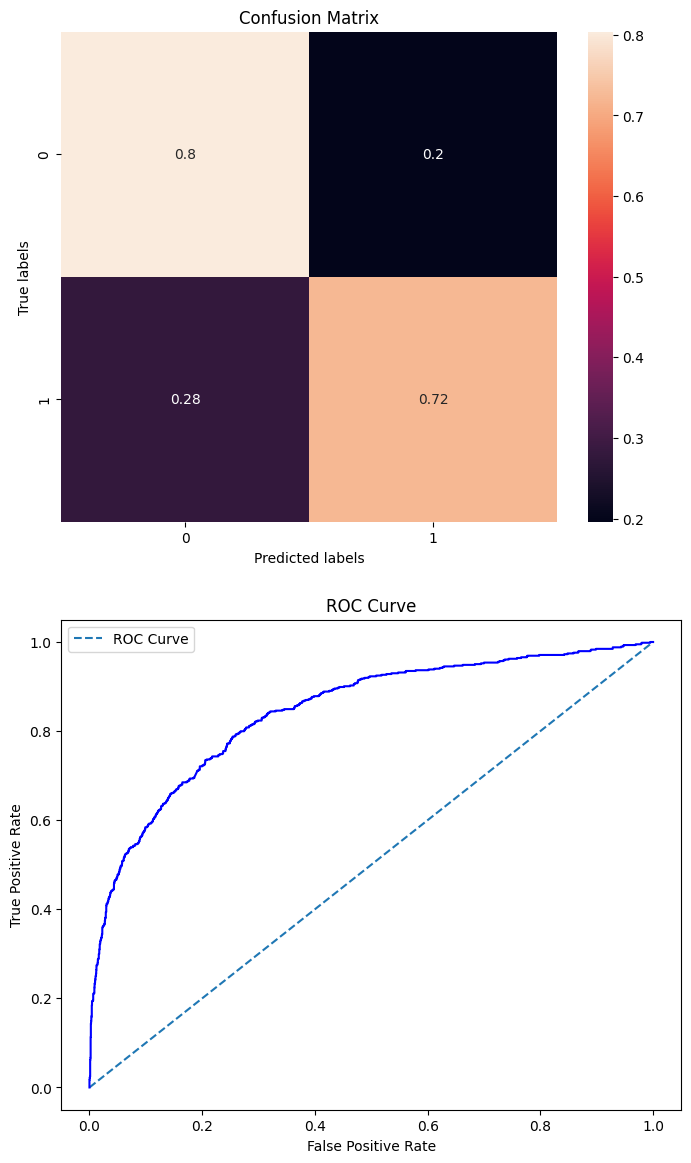

In [919]:
support=model_eval("SVM",SVM,X_train_res,X_test,y_train_res,y_test)

In [920]:
support

('SVM',
 SVC(probability=True),
 0.8359473589327564,
 0.7876666666666666,
 0.8359473589327564,
 0.7876666666666666,
 0.836039796825467,
 0.834542064871703,
 0.8359360762487377,
 0.8026878829604287,
 0.9145408320376387,
 0.8423512910505307)

In [921]:
metrics_B.loc[7]=list(support)
metrics_B

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   
5        Random_Forest_Hyperparameter_Tuning   
6                                  Ada_Boost   
7                                        SVM   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=1, max_iter=150, solver='...        0.705787   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='entropy', ma...        0.851361   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   
5  (DecisionTreeClassifier(max_depth=15, max_feat...        0.914008   
6  (DecisionTreeClassifier(max_depth=1, random_st...        0.842527   
7                              SVC(probability=True)        0.835947   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333         0.705620        0.796646   
1       0.704000      0.705787     0.704000         0.705799        0.796540   
2       0.776333      1.000000     0.776333         1.000000        0.794156   
3       0.773333      0.851361     0.773333         0.851364        0.810876   
4       0.846667      1.000000     0.846667         1.000000        0.845683   
5       0.830000      0.914008     0.830000         0.914013        0.842169   
6       0.820000      0.842527     0.820000         0.842528        0.842868   
7       0.787667      0.835947     0.787667         0.836040        0.834542   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867  
1  0.705783  0.731610   0.769417  0.763874  
2  1.000000  0.783959   1.000000  0.682601  
3  0.851361  0.786971   0.939113  0.791793  
4  1.000000  0.846163   1.000000  0.854908  
5  0.914007  0.834994   0.975361  0.856712  
6  0.842527  0.828384   0.920437  0.845890  
7  0.835936  0.802688   0.914541  0.842351

SVM Hyperparameter Tuning

In [922]:
param_list={
    "kernel":['linear','poly','rbf','sigmoid'],
    "C":[0.00001,0.0001,0.001,0.01,0.1,1,10],
    "gamma":['scale','auto'],
    "degree":[2,3,4,5],
}
SVM_HT=SVC(probability=True)

In [923]:
SVM_CV = RandomizedSearchCV(SVM_HT,param_list,n_iter=10)
SVM_CV.fit(X_train_res,y_train_res)

RandomizedSearchCV(estimator=SVC(probability=True),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10],
                                        'degree': [2, 3, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [924]:
print("best parameters: ",SVM_CV.best_params_)
best_SVM_cv=SVM_CV.best_estimator_

best parameters:  {'kernel': 'rbf', 'gamma': 'scale', 'degree': 5, 'C': 0.1}


              precision    recall  f1-score   support

           0       0.93      0.79      0.85      2416
           1       0.46      0.74      0.57       584

    accuracy                           0.78      3000
   macro avg       0.69      0.76      0.71      3000
weighted avg       0.84      0.78      0.80      3000



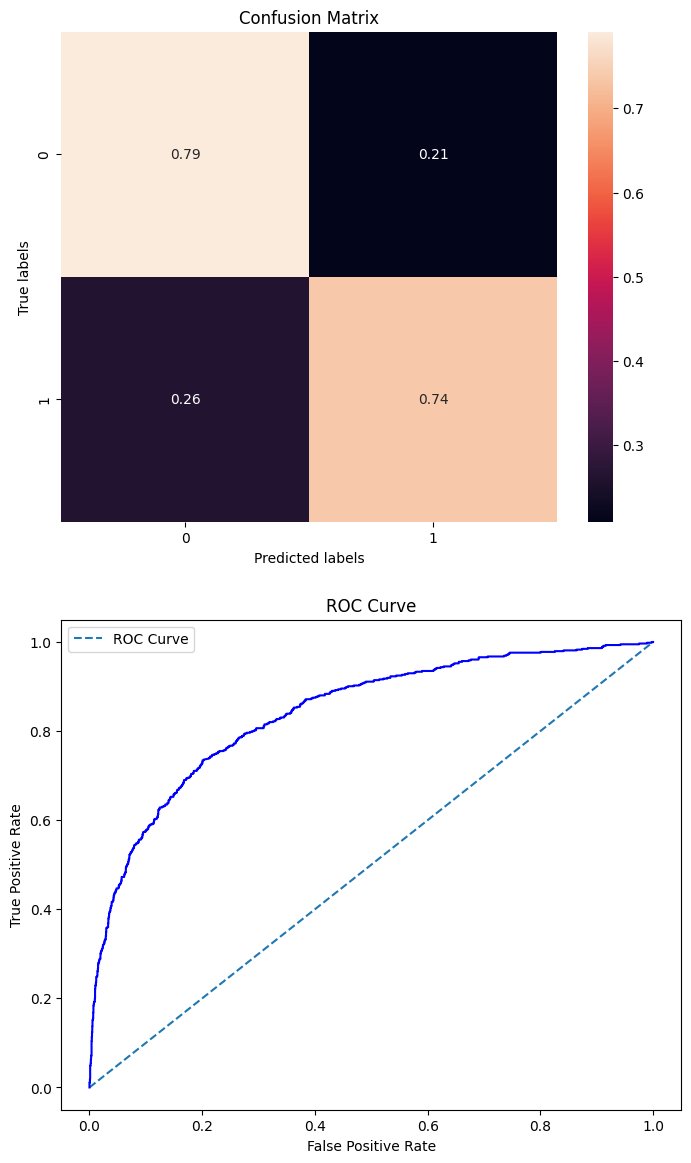

In [925]:
Random_SVM=model_eval("SVM_Hyperparameter_Tuning",best_SVM_cv,X_train_res,X_test,y_train_res,y_test)

In [926]:
Random_SVM

('SVM_Hyperparameter_Tuning',
 SVC(C=0.1, degree=5, probability=True),
 0.8025058590228953,
 0.7806666666666666,
 0.8025058590228953,
 0.7806666666666666,
 0.8025257690141548,
 0.8352738355529052,
 0.8025026095713442,
 0.7974464912280702,
 0.8817485363370894,
 0.8394422457588679)

In [927]:
metrics_B.loc[8]=list(Random_SVM)
metrics_B

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   
5        Random_Forest_Hyperparameter_Tuning   
6                                  Ada_Boost   
7                                        SVM   
8                  SVM_Hyperparameter_Tuning   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=1, max_iter=150, solver='...        0.705787   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='entropy', ma...        0.851361   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   
5  (DecisionTreeClassifier(max_depth=15, max_feat...        0.914008   
6  (DecisionTreeClassifier(max_depth=1, random_st...        0.842527   
7                              SVC(probability=True)        0.835947   
8             SVC(C=0.1, degree=5, probability=True)        0.802506   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333         0.705620        0.796646   
1       0.704000      0.705787     0.704000         0.705799        0.796540   
2       0.776333      1.000000     0.776333         1.000000        0.794156   
3       0.773333      0.851361     0.773333         0.851364        0.810876   
4       0.846667      1.000000     0.846667         1.000000        0.845683   
5       0.830000      0.914008     0.830000         0.914013        0.842169   
6       0.820000      0.842527     0.820000         0.842528        0.842868   
7       0.787667      0.835947     0.787667         0.836040        0.834542   
8       0.780667      0.802506     0.780667         0.802526        0.835274   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867  
1  0.705783  0.731610   0.769417  0.763874  
2  1.000000  0.783959   1.000000  0.682601  
3  0.851361  0.786971   0.939113  0.791793  
4  1.000000  0.846163   1.000000  0.854908  
5  0.914007  0.834994   0.975361  0.856712  
6  0.842527  0.828384   0.920437  0.845890  
7  0.835936  0.802688   0.914541  0.842351  
8  0.802503  0.797446   0.881749  0.839442

# THIRD PART GOING ON (Without outliers,Imbalanced)

Label Encoding

In [928]:
df3 = df_Out.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df3[col]=le.fit_transform(df3[col])

In [929]:
X=df3.drop(columns="Exited")
y=df3["Exited"]

# Data Spilitting

In [930]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(6799, 10)
(2915, 10)


# Data Scaling

In [931]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

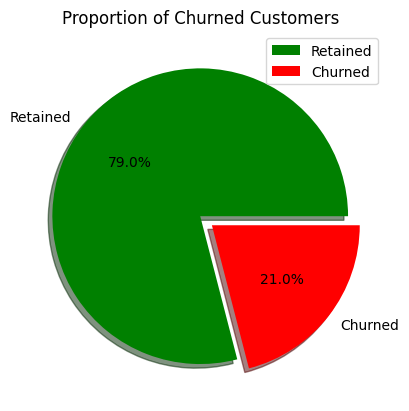

In [932]:
plt.pie(df3['Exited'].value_counts(),autopct='%1.1f%%',colors=['green','red'],labels=['Retained', 'Churned'],explode=(0,0.1),shadow=True)
plt.title('Proportion of Churned Customers')
plt.legend()
plt.show()

# Now doing model training on dataframe(without outliers ,scaled, imbalanced dataset)

**Model** **Implemetation**

C)This is for dataset which is without outliers, scaled and imbalanced

In [940]:
metrics_C=pd.DataFrame(columns=["model_name","model","Train_Accuracy","Test_Accuracy","Train_Recall","Test_Recall","Train_Precision","Test_Precision","Train_F1","Test_F1","Train_AUC","Test_AUC"])

# Logistic Regression

In [941]:
from sklearn.linear_model import LogisticRegression
L_clf = LogisticRegression(random_state=0).fit(X_train_res, y_train_res)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      2284
           1       0.40      0.69      0.50       631

    accuracy                           0.71      2915
   macro avg       0.65      0.70      0.65      2915
weighted avg       0.79      0.71      0.73      2915



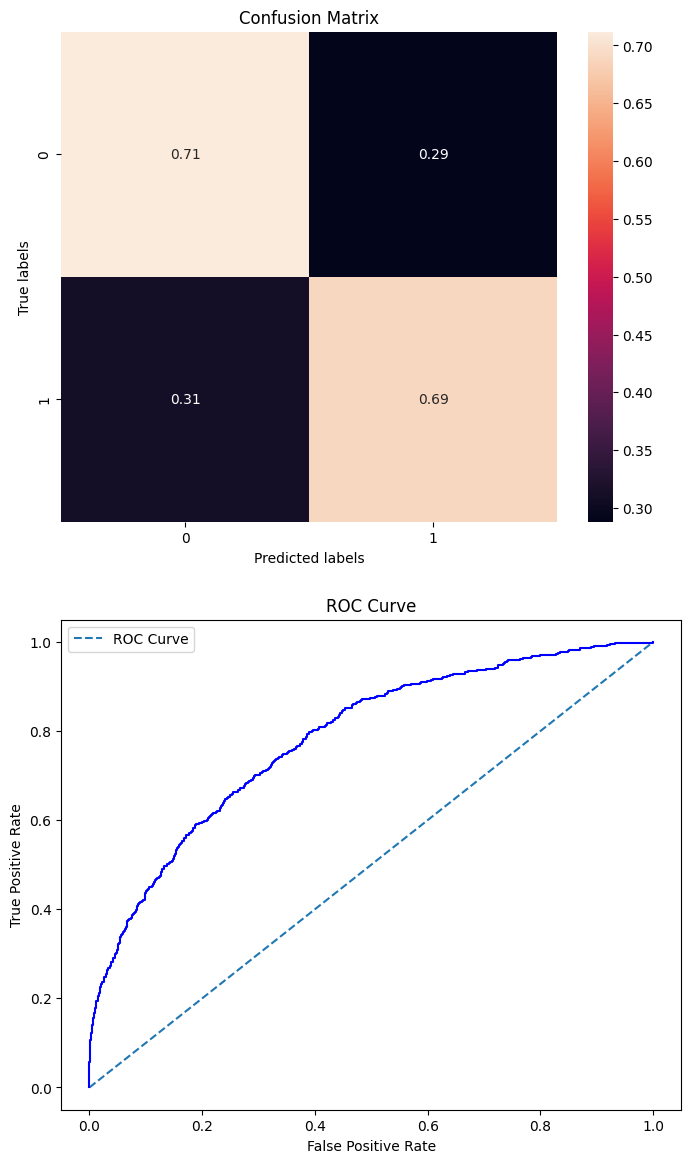

In [942]:
logistic=model_eval("Logistic_Regression",L_clf,X_train_res,X_test,y_train_res,y_test)

In [943]:
logi=logistic
print(logi)

('Logistic_Regression', LogisticRegression(random_state=0), 0.7056066342166937, 0.707032590051458, 0.7056066342166937, 0.707032590051458, 0.7056195718093053, 0.785396461764738, 0.7056020033329298, 0.7298054115555137, 0.7694159443617807, 0.7818879214878672)


In [944]:
metrics_C.loc[0]=list(logistic)
metrics_C

model_name                               model  Train_Accuracy  \
0  Logistic_Regression  LogisticRegression(random_state=0)        0.705607   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.707033      0.705607     0.707033          0.70562        0.785396   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.729805   0.769416  0.781888

Logistic Regression with Hyperparameter Tuning

In [945]:
from sklearn.model_selection import RandomizedSearchCV
param_list={
    "C":[0.01,0.1,1,10],
    "max_iter":[20,50,100,150],
    "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}

In [946]:
LHT_clf = LogisticRegression()
log_CV = RandomizedSearchCV(LHT_clf,param_list,n_iter=20)
log_CV.fit(X_train_res,y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

RandomizedSearchCV(estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'max_iter': [20, 50, 100, 150],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [947]:
print("best parameters: ",log_CV.best_params_)
best_log_cv=log_CV.best_estimator_

best parameters:  {'solver': 'sag', 'max_iter': 20, 'C': 10}


              precision    recall  f1-score   support

           0       0.89      0.71      0.79      2284
           1       0.40      0.69      0.50       631

    accuracy                           0.71      2915
   macro avg       0.64      0.70      0.65      2915
weighted avg       0.79      0.71      0.73      2915



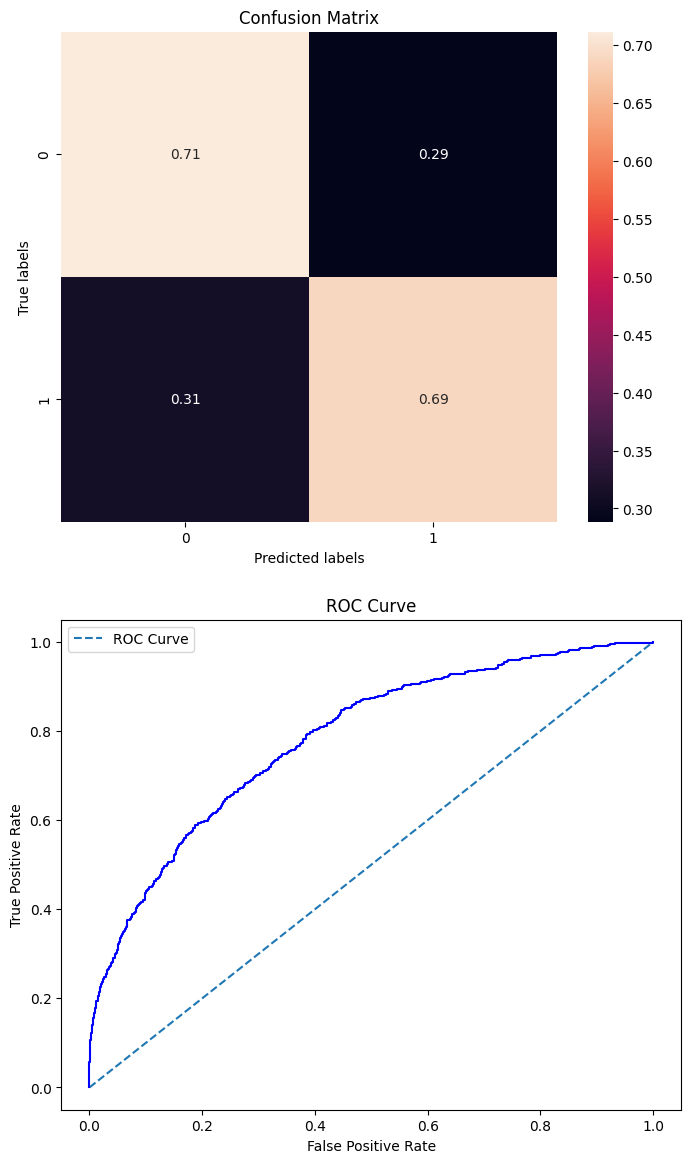

In [948]:
Logistic_RV=model_eval("Logistic_Regression_Hyperparameter_Tuning",best_log_cv,X_train_res,X_test,y_train_res,y_test)

In [949]:
Logistic_RV

('Logistic_Regression_Hyperparameter_Tuning',
 LogisticRegression(C=10, max_iter=20, solver='sag'),
 0.7055164954029205,
 0.7066895368782161,
 0.7055164954029205,
 0.7066895368782161,
 0.7055277239042409,
 0.7852714266120585,
 0.7055124732526236,
 0.7295115130283631,
 0.7694259543688627,
 0.7819011049095062)

In [950]:
metrics_C.loc[1]=list(Logistic_RV)
metrics_C

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=10, max_iter=20, solver='...        0.705516   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.707033      0.705607     0.707033         0.705620        0.785396   
1       0.706690      0.705516     0.706690         0.705528        0.785271   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.729805   0.769416  0.781888  
1  0.705512  0.729512   0.769426  0.781901

Desicion Tree

In [951]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(X_train_res, y_train_res)
depth=DT.tree_.max_depth
print(depth)
leaf_nodes=DT.get_n_leaves()
print(leaf_nodes)

24
1324


              precision    recall  f1-score   support

           0       0.93      0.62      0.75      2284
           1       0.38      0.84      0.52       631

    accuracy                           0.67      2915
   macro avg       0.66      0.73      0.64      2915
weighted avg       0.81      0.67      0.70      2915



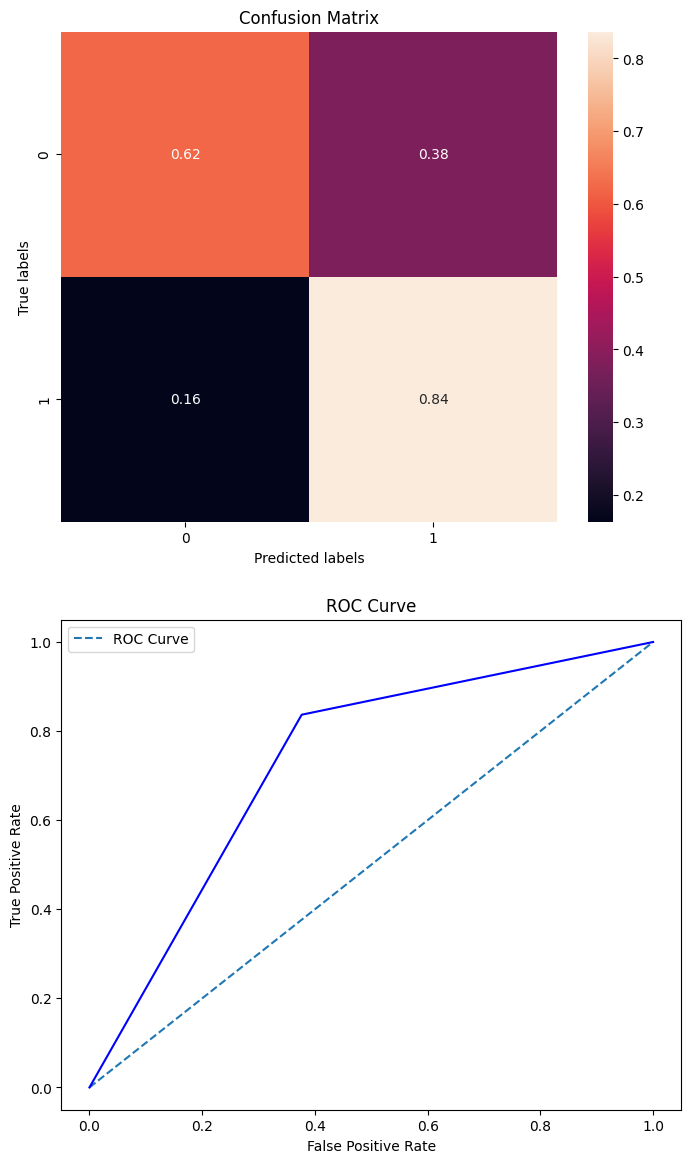

In [952]:
Des_tree=model_eval("Desicion Tree",DT,X_train_res,X_test,y_train_res,y_test)

In [953]:
Des_tree

('Desicion Tree',
 DecisionTreeClassifier(),
 1.0,
 0.669639794168096,
 1.0,
 0.669639794168096,
 1.0,
 0.813026766216435,
 1.0,
 0.6987614690790628,
 1.0,
 0.7301173185753023)

All the metrices for training are coming 1.0 , so it might be overfitting

In [954]:
metrics_C.loc[2]=list(Des_tree)
metrics_C

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=10, max_iter=20, solver='...        0.705516   
2                           DecisionTreeClassifier()        1.000000   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.707033      0.705607     0.707033         0.705620        0.785396   
1       0.706690      0.705516     0.706690         0.705528        0.785271   
2       0.669640      1.000000     0.669640         1.000000        0.813027   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.729805   0.769416  0.781888  
1  0.705512  0.729512   0.769426  0.781901  
2  1.000000  0.698761   1.000000  0.730117

Desicion Tree with Hyperparameter Tuning

In [955]:
DT_HT = DecisionTreeClassifier()
param_list={
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":["best", "random"],
    "max_depth":[5,10,15,20,25,30],
    "min_samples_split":[10,20,30,50,70,100],
    "min_samples_leaf":[5,10,15,20],
    "max_features":["auto", "sqrt", "log2"],
    "max_leaf_nodes":[100,200,400,500,700,900,1000,1200]
}

In [956]:
DT_CV = RandomizedSearchCV(DT_HT,param_list,n_iter=10)
DT_CV.fit(X_train_res,y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [100, 200, 400, 500,
                                                           700, 900, 1000,
                                                           1200],
                                        'min_samples_leaf': [5, 10, 15, 20],
                                        'min_samples_split': [10, 20, 30, 50,
                                                              70, 100],
                                        'splitter': ['best', 'random']})

In [957]:
print("best parameters: ",DT_CV.best_params_)
best_DT_cv=DT_CV.best_estimator_

best parameters:  {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_leaf_nodes': 100, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy'}


              precision    recall  f1-score   support

           0       0.90      0.58      0.70      2284
           1       0.34      0.78      0.47       631

    accuracy                           0.62      2915
   macro avg       0.62      0.68      0.59      2915
weighted avg       0.78      0.62      0.65      2915



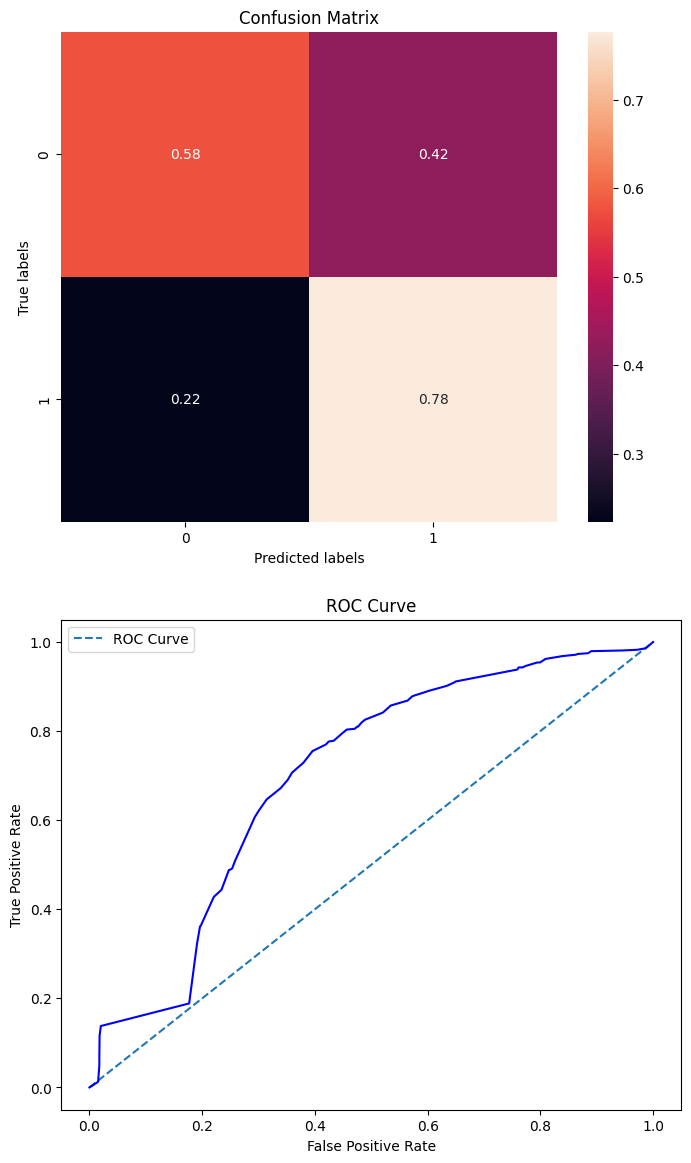

In [958]:
Desicion_RV=model_eval("Desicion_Tree_Hyperparameter_Tuning",best_DT_cv,X_train_res,X_test,y_train_res,y_test)

In [959]:
Desicion_RV

('Desicion_Tree_Hyperparameter_Tuning',
 DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='sqrt',
                        max_leaf_nodes=100, min_samples_leaf=5,
                        min_samples_split=10),
 0.8077339102217415,
 0.6192109777015438,
 0.8077339102217415,
 0.6192109777015438,
 0.8085256593560274,
 0.7803550795035012,
 0.8076104810753844,
 0.6524884872494388,
 0.8849537698547921,
 0.6967344664599876)

In [960]:
metrics_C.loc[3]=list(Desicion_RV)
metrics_C

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=10, max_iter=20, solver='...        0.705516   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='entropy', ma...        0.807734   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.707033      0.705607     0.707033         0.705620        0.785396   
1       0.706690      0.705516     0.706690         0.705528        0.785271   
2       0.669640      1.000000     0.669640         1.000000        0.813027   
3       0.619211      0.807734     0.619211         0.808526        0.780355   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.729805   0.769416  0.781888  
1  0.705512  0.729512   0.769426  0.781901  
2  1.000000  0.698761   1.000000  0.730117  
3  0.807610  0.652488   0.884954  0.696734

Random Forest Classifier

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      2284
           1       0.72      0.87      0.79       631

    accuracy                           0.90      2915
   macro avg       0.84      0.89      0.86      2915
weighted avg       0.91      0.90      0.90      2915



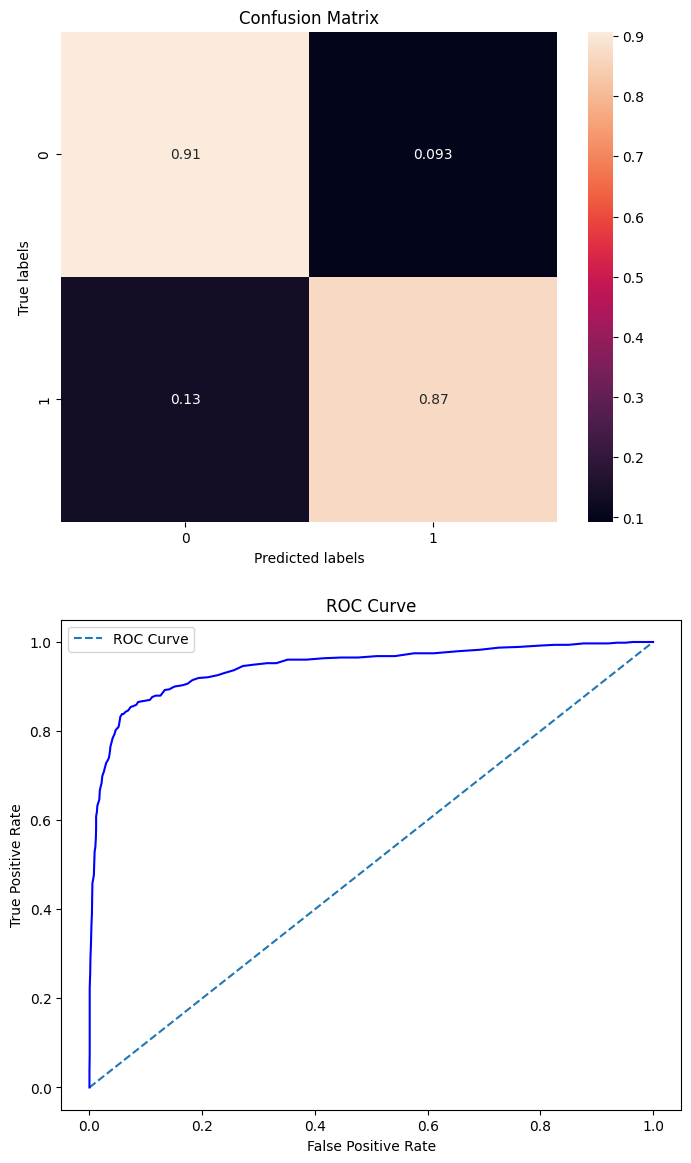

In [961]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier().fit(X_train_res, y_train_res)
Random_forest=model_eval("Random Forest",RF,X_train_res,X_test,y_train_res,y_test)

In [962]:
Random_forest

('Random Forest',
 RandomForestClassifier(),
 1.0,
 0.8984562607204116,
 1.0,
 0.8984562607204116,
 1.0,
 0.9090103919994292,
 1.0,
 0.901667962371098,
 1.0,
 0.9436703617253352)

In [963]:
metrics_C.loc[4]=list(Random_forest)
metrics_C

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=10, max_iter=20, solver='...        0.705516   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='entropy', ma...        0.807734   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.707033      0.705607     0.707033         0.705620        0.785396   
1       0.706690      0.705516     0.706690         0.705528        0.785271   
2       0.669640      1.000000     0.669640         1.000000        0.813027   
3       0.619211      0.807734     0.619211         0.808526        0.780355   
4       0.898456      1.000000     0.898456         1.000000        0.909010   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.729805   0.769416  0.781888  
1  0.705512  0.729512   0.769426  0.781901  
2  1.000000  0.698761   1.000000  0.730117  
3  0.807610  0.652488   0.884954  0.696734  
4  1.000000  0.901668   1.000000  0.943670

Random Forest Hyperparameter Tuning

In [964]:
param_list={
    "n_estimators":[10,20,30,40,50,60,70,80,90,100],
    "max_features":["sqrt", "log2", None],
    "max_depth":[5,10,15,20,25],
    "min_samples_split":[10,20,30,40,50,60,70,80,90,100],
    "min_samples_leaf":[10,20,30,40,50,60,70,80,90,100],
    "bootstrap":[False,True]
}
RF_HT=RandomForestClassifier()

In [965]:
RF_CV = RandomizedSearchCV(RF_HT,param_list,n_iter=10)
RF_CV.fit(X_train_res,y_train_res)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [10, 20, 30, 40, 50,
                                                             60, 70, 80, 90,
                                                             100],
                                        'min_samples_split': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              90, 100],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [966]:
print("best parameters: ",RF_CV.best_params_)
best_RF_cv=RF_CV.best_estimator_

best parameters:  {'n_estimators': 10, 'min_samples_split': 40, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}


              precision    recall  f1-score   support

           0       0.93      0.70      0.80      2284
           1       0.42      0.80      0.55       631

    accuracy                           0.72      2915
   macro avg       0.68      0.75      0.68      2915
weighted avg       0.82      0.72      0.75      2915



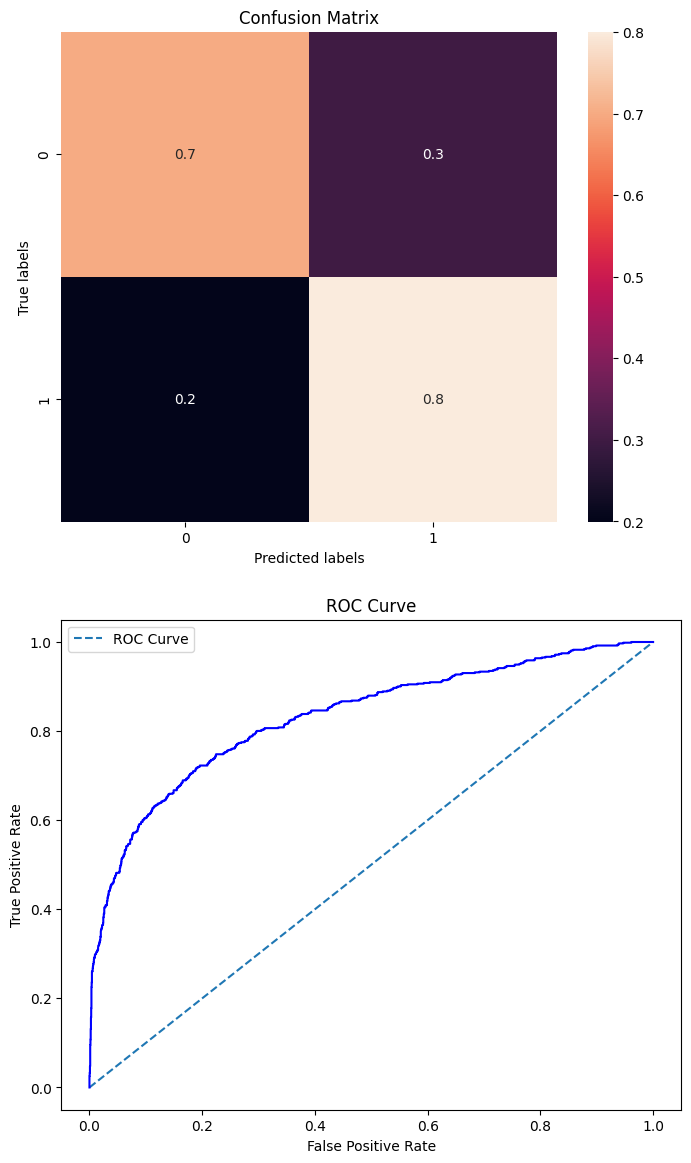

In [967]:
Random_RV=model_eval("Random_Forest_Hyperparameter_Tuning",best_RF_cv,X_train_res,X_test,y_train_res,y_test)

In [968]:
Random_RV

('Random_Forest_Hyperparameter_Tuning',
 RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=10,
                        min_samples_split=40, n_estimators=10),
 0.8684874707048855,
 0.7221269296740995,
 0.8684874707048855,
 0.7221269296740995,
 0.8684901652911258,
 0.8182737140812993,
 0.8684872302829333,
 0.745390641918191,
 0.944431931935592,
 0.8308209663586834)

In [969]:
metrics_C.loc[5]=list(Random_RV)
metrics_C

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   
5        Random_Forest_Hyperparameter_Tuning   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=10, max_iter=20, solver='...        0.705516   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='entropy', ma...        0.807734   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   
5  (DecisionTreeClassifier(max_depth=10, max_feat...        0.868487   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.707033      0.705607     0.707033         0.705620        0.785396   
1       0.706690      0.705516     0.706690         0.705528        0.785271   
2       0.669640      1.000000     0.669640         1.000000        0.813027   
3       0.619211      0.807734     0.619211         0.808526        0.780355   
4       0.898456      1.000000     0.898456         1.000000        0.909010   
5       0.722127      0.868487     0.722127         0.868490        0.818274   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.729805   0.769416  0.781888  
1  0.705512  0.729512   0.769426  0.781901  
2  1.000000  0.698761   1.000000  0.730117  
3  0.807610  0.652488   0.884954  0.696734  
4  1.000000  0.901668   1.000000  0.943670  
5  0.868487  0.745391   0.944432  0.830821

Adaboost Algorithm

In [970]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators=80, random_state=0).fit(X_train_res, y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.20      0.33      2284
           1       0.24      0.91      0.38       631

    accuracy                           0.35      2915
   macro avg       0.56      0.56      0.35      2915
weighted avg       0.75      0.35      0.34      2915



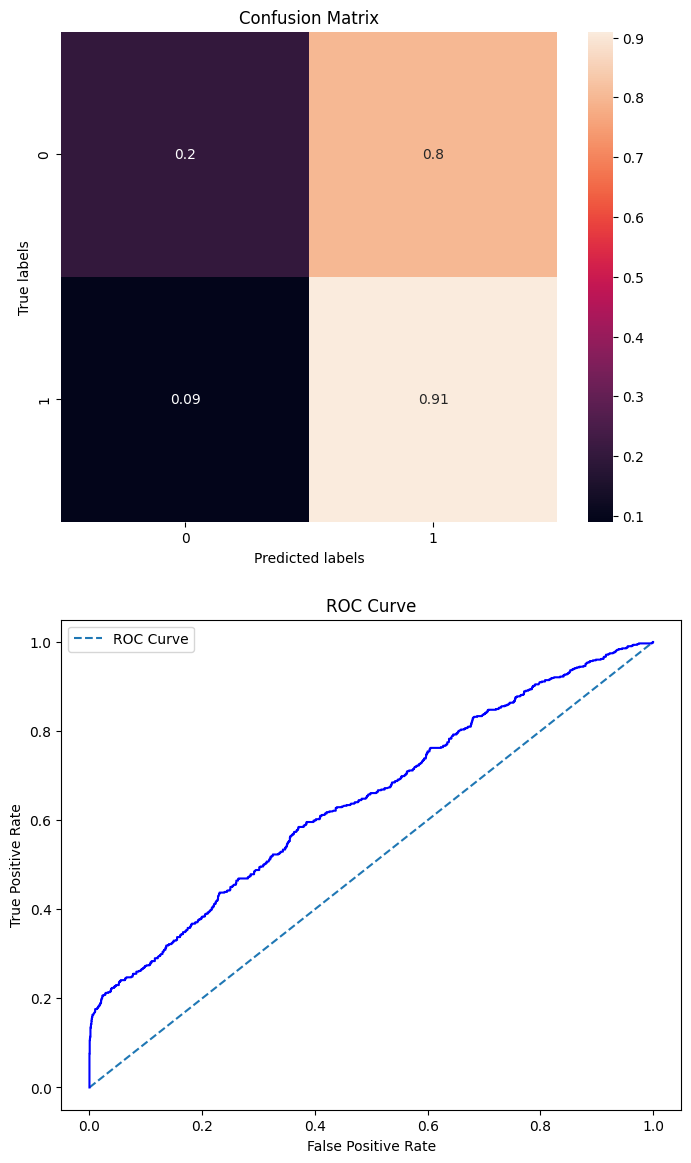

In [971]:
Ada_boost=model_eval("Ada_Boost",Ada,X_train_res,X_test,y_train_res,y_test)

In [972]:
Ada_boost

('Ada_Boost',
 AdaBoostClassifier(n_estimators=80, random_state=0),
 0.8425274923382008,
 0.3543739279588336,
 0.8425274923382008,
 0.3543739279588336,
 0.8425277706422115,
 0.7487734985246473,
 0.8425274603515686,
 0.33890142760906816,
 0.9204370999592482,
 0.6447272558222152)

In [973]:
metrics_C.loc[6]=list(Ada_boost)
metrics_C

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   
5        Random_Forest_Hyperparameter_Tuning   
6                                  Ada_Boost   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=10, max_iter=20, solver='...        0.705516   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='entropy', ma...        0.807734   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   
5  (DecisionTreeClassifier(max_depth=10, max_feat...        0.868487   
6  (DecisionTreeClassifier(max_depth=1, random_st...        0.842527   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.707033      0.705607     0.707033         0.705620        0.785396   
1       0.706690      0.705516     0.706690         0.705528        0.785271   
2       0.669640      1.000000     0.669640         1.000000        0.813027   
3       0.619211      0.807734     0.619211         0.808526        0.780355   
4       0.898456      1.000000     0.898456         1.000000        0.909010   
5       0.722127      0.868487     0.722127         0.868490        0.818274   
6       0.354374      0.842527     0.354374         0.842528        0.748773   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.729805   0.769416  0.781888  
1  0.705512  0.729512   0.769426  0.781901  
2  1.000000  0.698761   1.000000  0.730117  
3  0.807610  0.652488   0.884954  0.696734  
4  1.000000  0.901668   1.000000  0.943670  
5  0.868487  0.745391   0.944432  0.830821  
6  0.842527  0.338901   0.920437  0.644727

Support Vector Machine Classification

In [974]:
from sklearn.svm import SVC
SVM=SVC(probability=True).fit(X_train_res, y_train_res)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      2284
           1       0.51      0.76      0.61       631

    accuracy                           0.79      2915
   macro avg       0.72      0.78      0.74      2915
weighted avg       0.84      0.79      0.81      2915



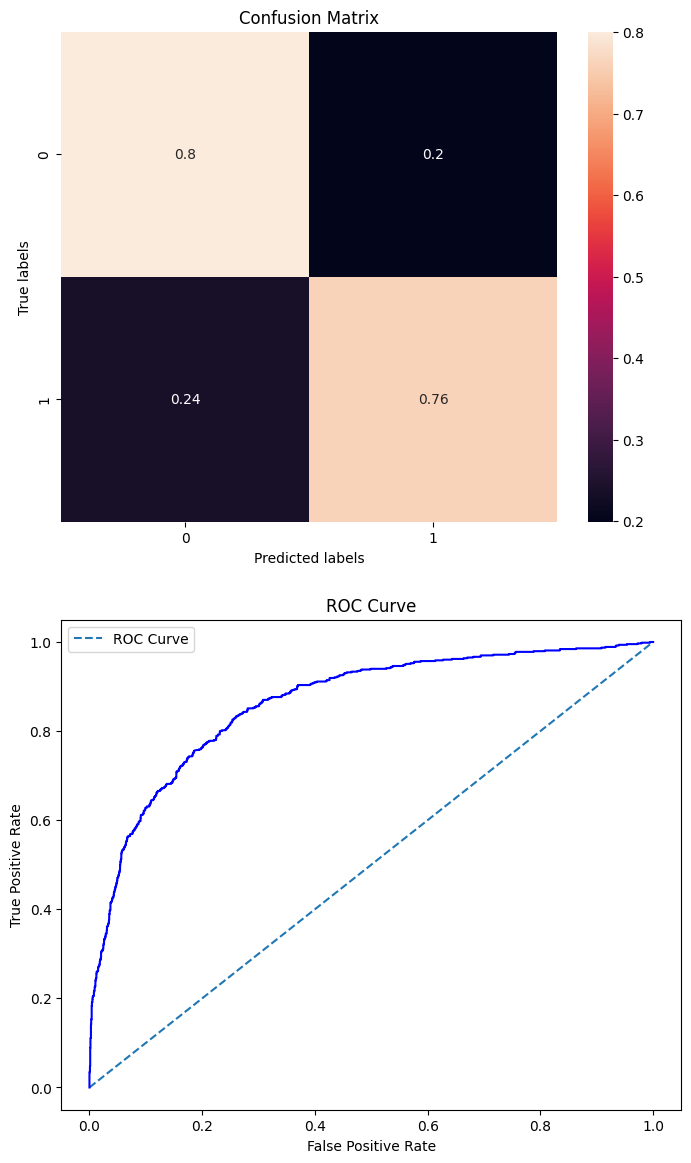

In [975]:
support=model_eval("SVM",SVM,X_train_res,X_test,y_train_res,y_test)

In [976]:
support

('SVM',
 SVC(probability=True),
 0.8359473589327564,
 0.7924528301886793,
 0.8359473589327564,
 0.7924528301886793,
 0.836039796825467,
 0.8353846149771764,
 0.8359360762487377,
 0.8052266921286391,
 0.914541758288294,
 0.86266135814222)

In [977]:
metrics_C.loc[7]=list(support)
metrics_C

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   
5        Random_Forest_Hyperparameter_Tuning   
6                                  Ada_Boost   
7                                        SVM   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=10, max_iter=20, solver='...        0.705516   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='entropy', ma...        0.807734   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   
5  (DecisionTreeClassifier(max_depth=10, max_feat...        0.868487   
6  (DecisionTreeClassifier(max_depth=1, random_st...        0.842527   
7                              SVC(probability=True)        0.835947   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.707033      0.705607     0.707033         0.705620        0.785396   
1       0.706690      0.705516     0.706690         0.705528        0.785271   
2       0.669640      1.000000     0.669640         1.000000        0.813027   
3       0.619211      0.807734     0.619211         0.808526        0.780355   
4       0.898456      1.000000     0.898456         1.000000        0.909010   
5       0.722127      0.868487     0.722127         0.868490        0.818274   
6       0.354374      0.842527     0.354374         0.842528        0.748773   
7       0.792453      0.835947     0.792453         0.836040        0.835385   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.729805   0.769416  0.781888  
1  0.705512  0.729512   0.769426  0.781901  
2  1.000000  0.698761   1.000000  0.730117  
3  0.807610  0.652488   0.884954  0.696734  
4  1.000000  0.901668   1.000000  0.943670  
5  0.868487  0.745391   0.944432  0.830821  
6  0.842527  0.338901   0.920437  0.644727  
7  0.835936  0.805227   0.914542  0.862661

SVM Hyperparameter Tuning

In [978]:
param_list={
    "kernel":['linear','poly','rbf','sigmoid'],
    "C":[0.00001,0.0001,0.001,0.01,0.1,1,10],
    "gamma":['scale','auto'],
    "degree":[2,3,4,5],
}
SVM_HT=SVC(probability=True)

In [979]:
SVM_CV = RandomizedSearchCV(SVM_HT,param_list,n_iter=10)
SVM_CV.fit(X_train_res,y_train_res)

RandomizedSearchCV(estimator=SVC(probability=True),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10],
                                        'degree': [2, 3, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [980]:
print("best parameters: ",SVM_CV.best_params_)
best_SVM_cv=SVM_CV.best_estimator_

best parameters:  {'kernel': 'poly', 'gamma': 'auto', 'degree': 5, 'C': 10}


              precision    recall  f1-score   support

           0       0.93      0.84      0.88      2284
           1       0.57      0.77      0.66       631

    accuracy                           0.82      2915
   macro avg       0.75      0.81      0.77      2915
weighted avg       0.85      0.82      0.83      2915



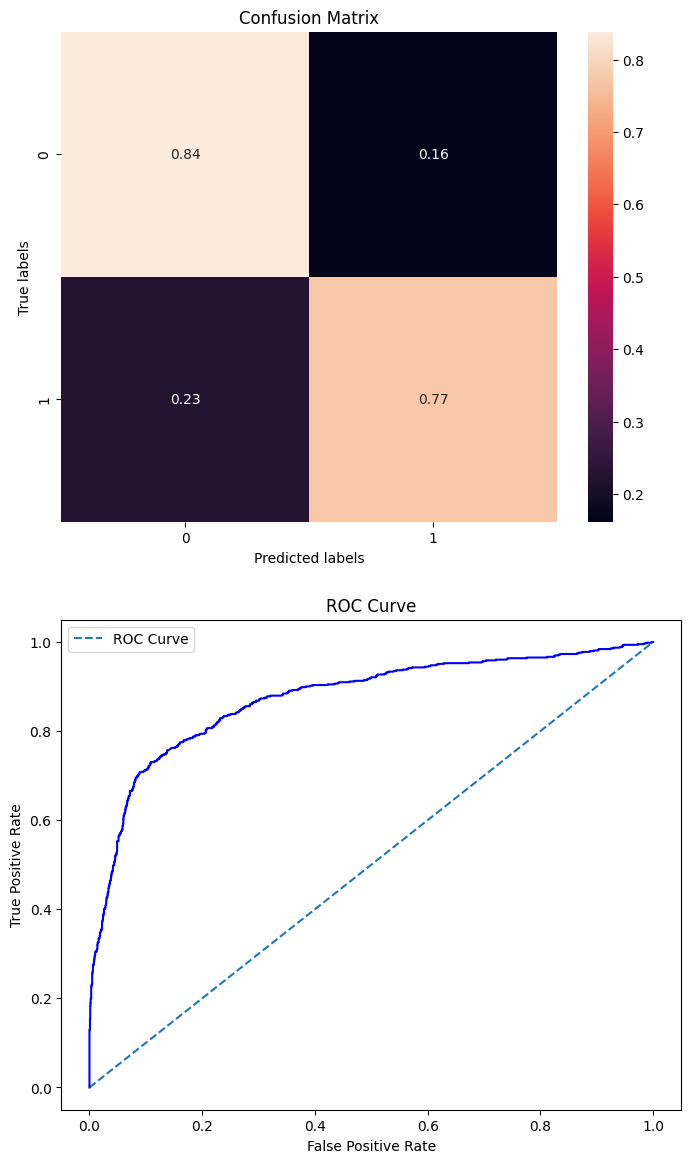

In [981]:
Random_SVM=model_eval("SVM_Hyperparameter_Tuning",best_SVM_cv,X_train_res,X_test,y_train_res,y_test)

In [982]:
Random_SVM

('SVM_Hyperparameter_Tuning',
 SVC(C=10, degree=5, gamma='auto', kernel='poly', probability=True),
 0.9005768884081485,
 0.8246998284734134,
 0.9005768884081485,
 0.8246998284734134,
 0.9009669061864819,
 0.8528149160715364,
 0.9005527054816583,
 0.8334787919083331,
 0.9583317205196924,
 0.8722668685349192)

In [983]:
metrics_C.loc[8]=list(Random_SVM)
metrics_C

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   
5        Random_Forest_Hyperparameter_Tuning   
6                                  Ada_Boost   
7                                        SVM   
8                  SVM_Hyperparameter_Tuning   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=10, max_iter=20, solver='...        0.705516   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='entropy', ma...        0.807734   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   
5  (DecisionTreeClassifier(max_depth=10, max_feat...        0.868487   
6  (DecisionTreeClassifier(max_depth=1, random_st...        0.842527   
7                              SVC(probability=True)        0.835947   
8  SVC(C=10, degree=5, gamma='auto', kernel='poly...        0.900577   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.707033      0.705607     0.707033         0.705620        0.785396   
1       0.706690      0.705516     0.706690         0.705528        0.785271   
2       0.669640      1.000000     0.669640         1.000000        0.813027   
3       0.619211      0.807734     0.619211         0.808526        0.780355   
4       0.898456      1.000000     0.898456         1.000000        0.909010   
5       0.722127      0.868487     0.722127         0.868490        0.818274   
6       0.354374      0.842527     0.354374         0.842528        0.748773   
7       0.792453      0.835947     0.792453         0.836040        0.835385   
8       0.824700      0.900577     0.824700         0.900967        0.852815   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.729805   0.769416  0.781888  
1  0.705512  0.729512   0.769426  0.781901  
2  1.000000  0.698761   1.000000  0.730117  
3  0.807610  0.652488   0.884954  0.696734  
4  1.000000  0.901668   1.000000  0.943670  
5  0.868487  0.745391   0.944432  0.830821  
6  0.842527  0.338901   0.920437  0.644727  
7  0.835936  0.805227   0.914542  0.862661  
8  0.900553  0.833479   0.958332  0.872267

# Fourth PART GOING ON (With outliers,Imbalanced)

Label Encoding

In [984]:
df4 = df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df4[col] = df4[col].astype('category')

In [985]:
X=df4.drop(columns="Exited")
y=df4["Exited"]

# Data Spilitting

In [986]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(7000, 10)
(3000, 10)


# Data Scaling

### label encoding

In [988]:
df4 = df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df4[col]=le.fit_transform(df4[col])

In [991]:
X=df4.drop(columns="Exited")
y=df4["Exited"]

# Data Spilitting

In [992]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(7000, 10)
(3000, 10)


In [993]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

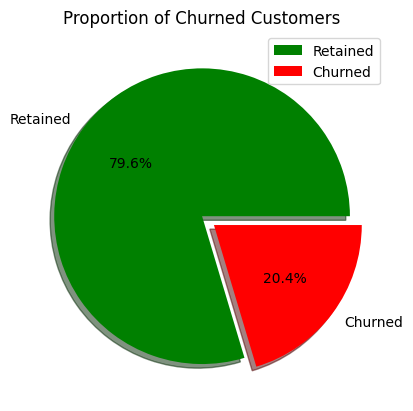

In [994]:
plt.pie(df4['Exited'].value_counts(),autopct='%1.1f%%',colors=['green','red'],labels=['Retained', 'Churned'],explode=(0,0.1),shadow=True)
plt.title('Proportion of Churned Customers')
plt.legend()
plt.show()

# Now doing model training on dataframe(With outliers ,scaled, imbalanced dataset)

**Model** **Implemetation**

A)This is for dataset which is with outliers, scaled and balanced

In [995]:
metrics_D=pd.DataFrame(columns=["model_name","model","Train_Accuracy","Test_Accuracy","Train_Recall","Test_Recall","Train_Precision","Test_Precision","Train_F1","Test_F1","Train_AUC","Test_AUC"])

# Logistic Regression

In [996]:
from sklearn.linear_model import LogisticRegression
L_clf = LogisticRegression(random_state=0).fit(X_train_res, y_train_res)

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      2416
           1       0.36      0.68      0.47       584

    accuracy                           0.70      3000
   macro avg       0.63      0.70      0.63      3000
weighted avg       0.80      0.70      0.73      3000



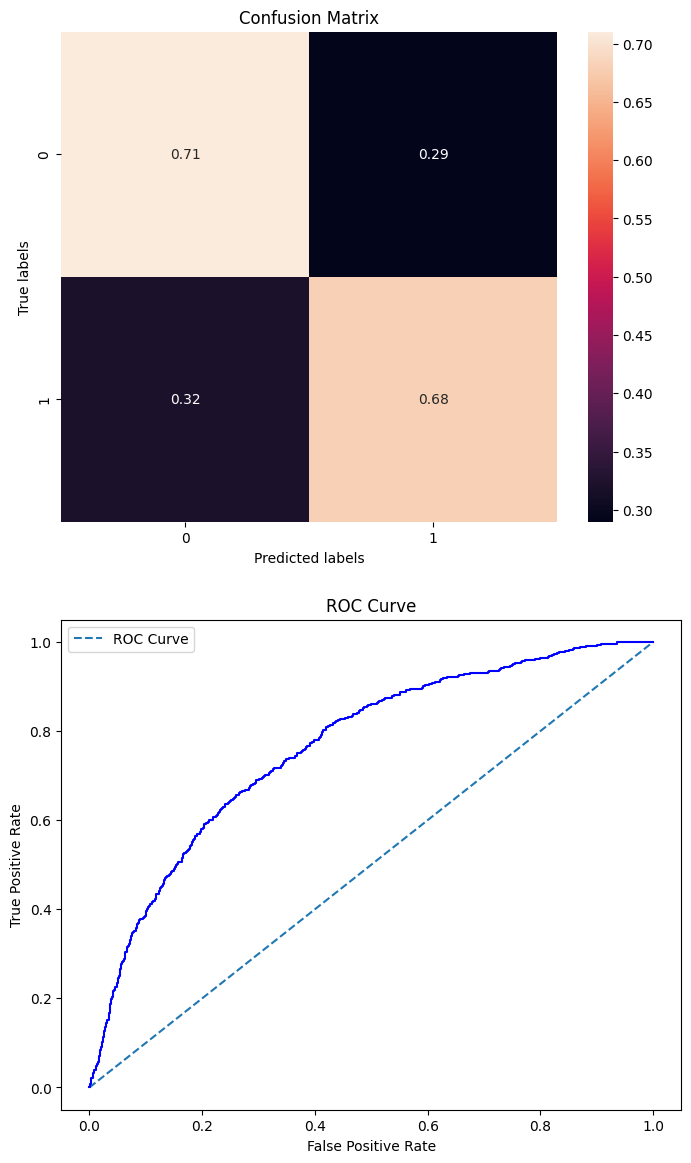

In [997]:
logistic=model_eval("Logistic_Regression",L_clf,X_train_res,X_test,y_train_res,y_test)

In [998]:
logi=logistic
print(logi)

('Logistic_Regression', LogisticRegression(random_state=0), 0.7056066342166937, 0.7043333333333334, 0.7056066342166937, 0.7043333333333334, 0.7056195718093053, 0.7966456354078297, 0.7056020033329298, 0.7318891704070165, 0.7694159443617807, 0.7638666027850857)


In [999]:
metrics_D.loc[0]=list(logistic)
metrics_D

model_name                               model  Train_Accuracy  \
0  Logistic_Regression  LogisticRegression(random_state=0)        0.705607   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333          0.70562        0.796646   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867

Logistic Regression with Hyperparameter Tuning

In [1000]:
from sklearn.model_selection import RandomizedSearchCV
param_list={
    "C":[0.01,0.1,1,10],
    "max_iter":[20,50,100,150],
    "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}

In [1001]:
LHT_clf = LogisticRegression()
log_CV = RandomizedSearchCV(LHT_clf,param_list,n_iter=20)
log_CV.fit(X_train_res,y_train_res)

RandomizedSearchCV(estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'max_iter': [20, 50, 100, 150],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [1002]:
print("best parameters: ",log_CV.best_params_)
best_log_cv=log_CV.best_estimator_

best parameters:  {'solver': 'sag', 'max_iter': 150, 'C': 1}


              precision    recall  f1-score   support

           0       0.90      0.71      0.79      2416
           1       0.36      0.68      0.47       584

    accuracy                           0.70      3000
   macro avg       0.63      0.70      0.63      3000
weighted avg       0.80      0.70      0.73      3000



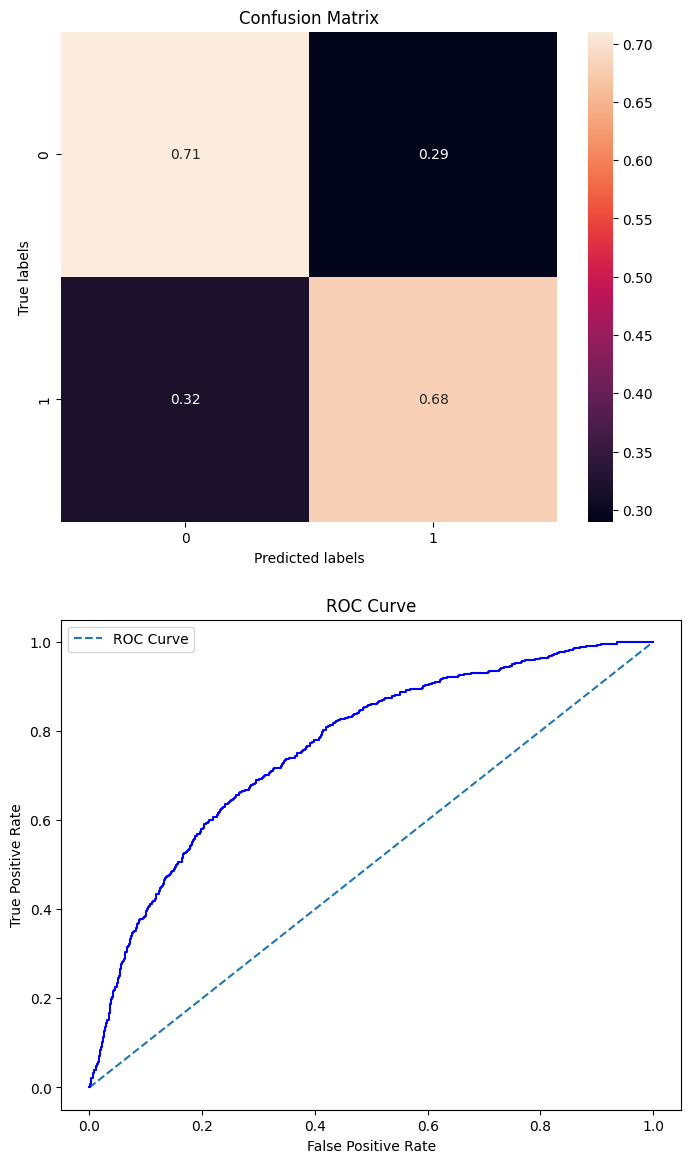

In [1003]:
Logistic_RV=model_eval("Logistic_Regression_Hyperparameter_Tuning",best_log_cv,X_train_res,X_test,y_train_res,y_test)

In [1004]:
Logistic_RV

('Logistic_Regression_Hyperparameter_Tuning',
 LogisticRegression(C=1, max_iter=150, solver='sag'),
 0.705696773030467,
 0.7043333333333334,
 0.705696773030467,
 0.7043333333333334,
 0.7057091346153846,
 0.7966456354078297,
 0.7056923516067485,
 0.7318891704070165,
 0.7694156843615967,
 0.7638736902385921)

In [1005]:
metrics_D.loc[1]=list(Logistic_RV)
metrics_D

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=1, max_iter=150, solver='...        0.705697   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333         0.705620        0.796646   
1       0.704333      0.705697     0.704333         0.705709        0.796646   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867  
1  0.705692  0.731889   0.769416  0.763874

Desicion Tree

In [1006]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(X_train_res, y_train_res)
depth=DT.tree_.max_depth
print(depth)
leaf_nodes=DT.get_n_leaves()
print(leaf_nodes)

26
1324


              precision    recall  f1-score   support

           0       0.88      0.84      0.86      2416
           1       0.44      0.54      0.48       584

    accuracy                           0.78      3000
   macro avg       0.66      0.69      0.67      3000
weighted avg       0.80      0.78      0.79      3000



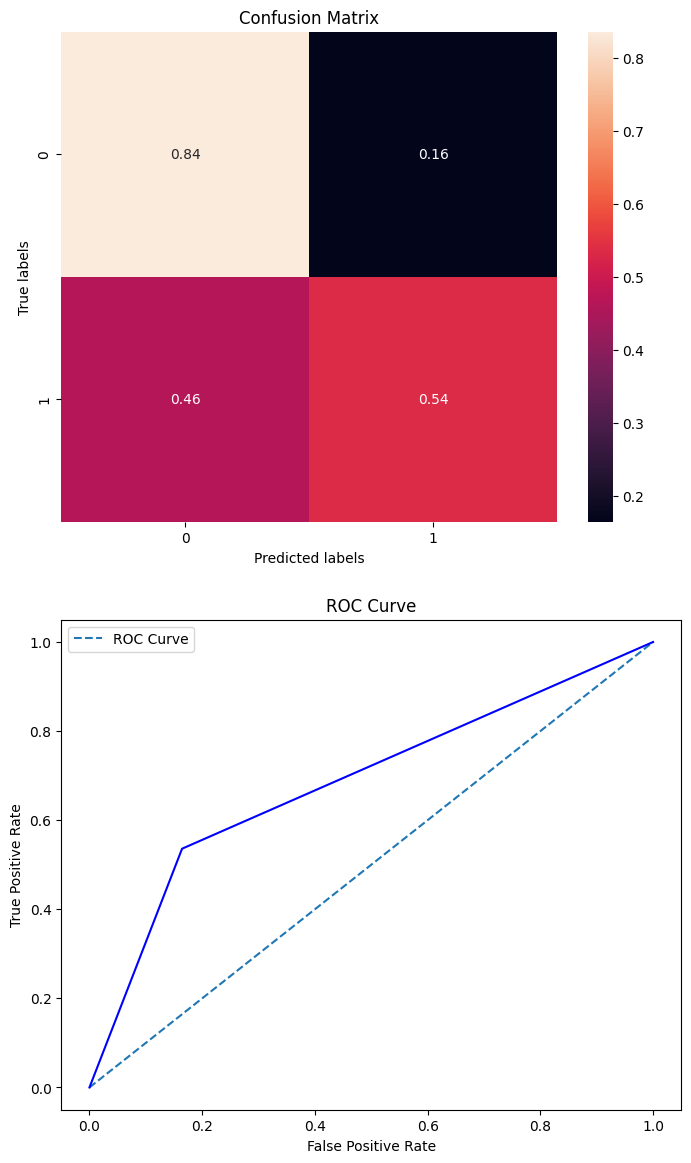

In [1007]:
Des_tree=model_eval("Desicion Tree",DT,X_train_res,X_test,y_train_res,y_test)

In [1008]:
Des_tree

('Desicion Tree',
 DecisionTreeClassifier(),
 1.0,
 0.7773333333333333,
 1.0,
 0.7773333333333333,
 1.0,
 0.7958475346987309,
 1.0,
 0.7851932615646483,
 1.0,
 0.6858188560283044)

All the metrices for training are coming 1.0 , so it might be overfitting

In [1009]:
metrics_D.loc[2]=list(Des_tree)
metrics_D

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=1, max_iter=150, solver='...        0.705697   
2                           DecisionTreeClassifier()        1.000000   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333         0.705620        0.796646   
1       0.704333      0.705697     0.704333         0.705709        0.796646   
2       0.777333      1.000000     0.777333         1.000000        0.795848   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867  
1  0.705692  0.731889   0.769416  0.763874  
2  1.000000  0.785193   1.000000  0.685819

Desicion Tree with Hyperparameter Tuning

In [1010]:
DT_HT = DecisionTreeClassifier()
param_list={
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":["best", "random"],
    "max_depth":[5,10,15,20,25,30],
    "min_samples_split":[10,20,30,50,70,100],
    "min_samples_leaf":[5,10,15,20],
    "max_features":["auto", "sqrt", "log2"],
    "max_leaf_nodes":[100,200,400,500,700,900,1000,1200]
}

In [1011]:
DT_CV = RandomizedSearchCV(DT_HT,param_list,n_iter=10)
DT_CV.fit(X_train_res,y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [100, 200, 400, 500,
                                                           700, 900, 1000,
                                                           1200],
                                        'min_samples_leaf': [5, 10, 15, 20],
                                        'min_samples_split': [10, 20, 30, 50,
                                                              70, 100],
                                        'splitter': ['best', 'random']})

In [1012]:
print("best parameters: ",DT_CV.best_params_)
best_DT_cv=DT_CV.best_estimator_

best parameters:  {'splitter': 'best', 'min_samples_split': 30, 'min_samples_leaf': 15, 'max_leaf_nodes': 1200, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'log_loss'}


              precision    recall  f1-score   support

           0       0.90      0.82      0.86      2416
           1       0.45      0.61      0.52       584

    accuracy                           0.78      3000
   macro avg       0.67      0.72      0.69      3000
weighted avg       0.81      0.78      0.79      3000



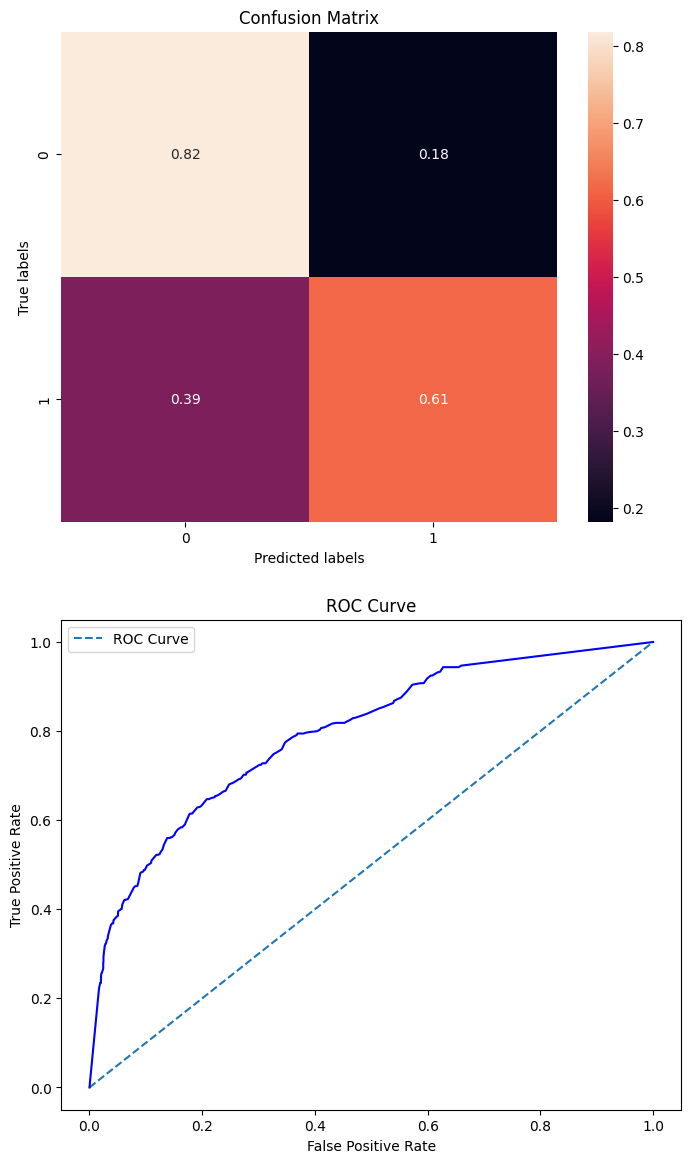

In [1013]:
Desicion_RV=model_eval("Desicion_Tree_Hyperparameter_Tuning",best_DT_cv,X_train_res,X_test,y_train_res,y_test)

In [1014]:
Desicion_RV

('Desicion_Tree_Hyperparameter_Tuning',
 DecisionTreeClassifier(criterion='log_loss', max_depth=20, max_features='log2',
                        max_leaf_nodes=1200, min_samples_leaf=15,
                        min_samples_split=30),
 0.8603749774652966,
 0.7783333333333333,
 0.8603749774652966,
 0.7783333333333333,
 0.8604008515617382,
 0.8104731171423009,
 0.860372471411187,
 0.7904022090701613,
 0.9436074876022975,
 0.7934248276331307)

In [1015]:
metrics_D.loc[3]=list(Desicion_RV)
metrics_D

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=1, max_iter=150, solver='...        0.705697   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='log_loss', m...        0.860375   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333         0.705620        0.796646   
1       0.704333      0.705697     0.704333         0.705709        0.796646   
2       0.777333      1.000000     0.777333         1.000000        0.795848   
3       0.778333      0.860375     0.778333         0.860401        0.810473   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867  
1  0.705692  0.731889   0.769416  0.763874  
2  1.000000  0.785193   1.000000  0.685819  
3  0.860372  0.790402   0.943607  0.793425

Random Forest Classifier

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2416
           1       0.60      0.59      0.60       584

    accuracy                           0.84      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.84      0.84      0.84      3000



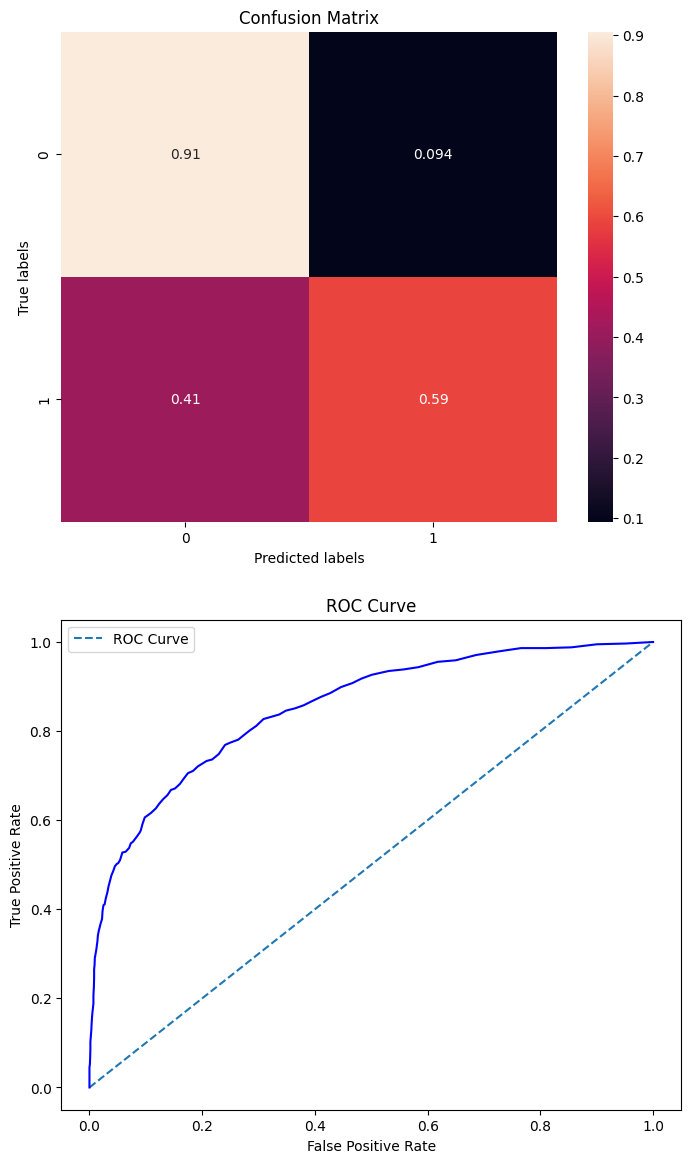

In [1016]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier().fit(X_train_res, y_train_res)
Random_forest=model_eval("Random Forest",RF,X_train_res,X_test,y_train_res,y_test)

In [1017]:
Random_forest

('Random Forest',
 RandomForestClassifier(),
 1.0,
 0.8446666666666667,
 1.0,
 0.8446666666666667,
 1.0,
 0.8434729937827136,
 1.0,
 0.844052841265714,
 1.0,
 0.851133000317518)

In [1018]:
metrics_D.loc[4]=list(Random_forest)
metrics_D

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=1, max_iter=150, solver='...        0.705697   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='log_loss', m...        0.860375   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333         0.705620        0.796646   
1       0.704333      0.705697     0.704333         0.705709        0.796646   
2       0.777333      1.000000     0.777333         1.000000        0.795848   
3       0.778333      0.860375     0.778333         0.860401        0.810473   
4       0.844667      1.000000     0.844667         1.000000        0.843473   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867  
1  0.705692  0.731889   0.769416  0.763874  
2  1.000000  0.785193   1.000000  0.685819  
3  0.860372  0.790402   0.943607  0.793425  
4  1.000000  0.844053   1.000000  0.851133

Random Forest Hyperparameter Tuning

In [1019]:
param_list={
    "n_estimators":[10,20,30,40,50,60,70,80,90,100],
    "max_features":["sqrt", "log2", None],
    "max_depth":[5,10,15,20,25],
    "min_samples_split":[10,20,30,40,50,60,70,80,90,100],
    "min_samples_leaf":[10,20,30,40,50,60,70,80,90,100],
    "bootstrap":[False,True]
}
RF_HT=RandomForestClassifier()

In [1020]:
RF_CV = RandomizedSearchCV(RF_HT,param_list,n_iter=10)
RF_CV.fit(X_train_res,y_train_res)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [10, 20, 30, 40, 50,
                                                             60, 70, 80, 90,
                                                             100],
                                        'min_samples_split': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              90, 100],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [1021]:
print("best parameters: ",RF_CV.best_params_)
best_RF_cv=RF_CV.best_estimator_

best parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2416
           1       0.54      0.68      0.60       584

    accuracy                           0.82      3000
   macro avg       0.73      0.77      0.74      3000
weighted avg       0.84      0.82      0.83      3000



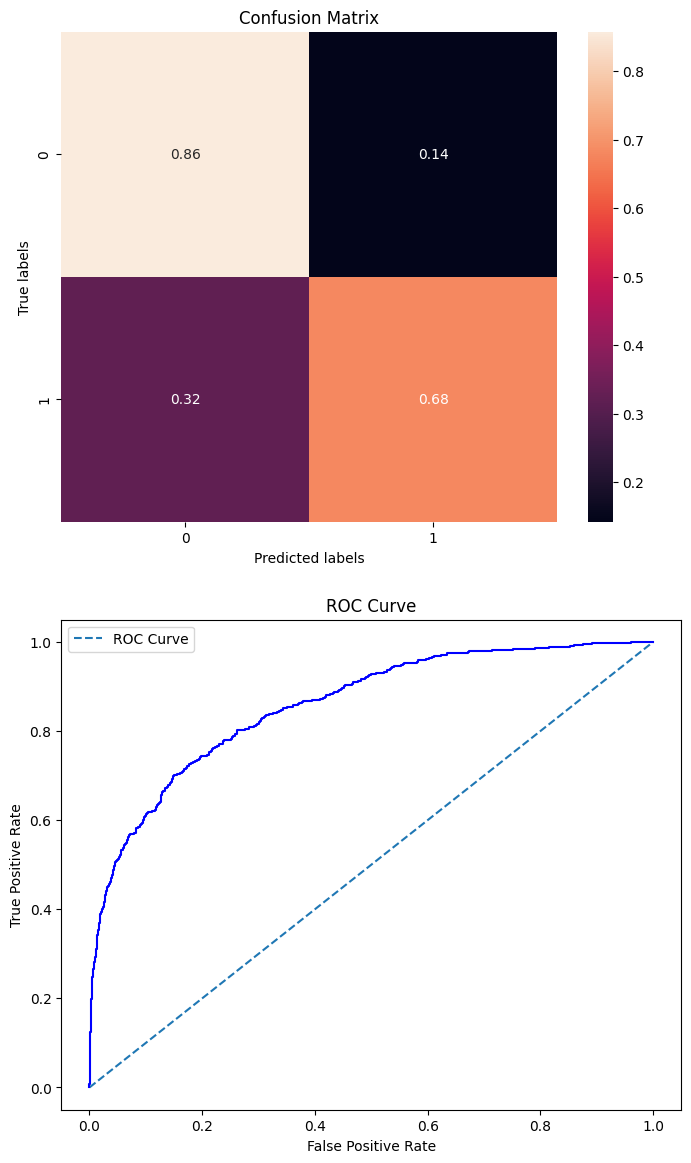

In [1022]:
Random_RV=model_eval("Random_Forest_Hyperparameter_Tuning",best_RF_cv,X_train_res,X_test,y_train_res,y_test)

In [1023]:
Random_RV

('Random_Forest_Hyperparameter_Tuning',
 RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=10,
                        min_samples_split=10),
 0.8944474490715703,
 0.823,
 0.8944474490715703,
 0.823,
 0.8945357827368028,
 0.8429629438461478,
 0.894441540630549,
 0.8305143295328422,
 0.9621156981968566,
 0.8580099564546857)

In [1024]:
metrics_D.loc[5]=list(Random_RV)
metrics_D

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   
5        Random_Forest_Hyperparameter_Tuning   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=1, max_iter=150, solver='...        0.705697   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='log_loss', m...        0.860375   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   
5  (DecisionTreeClassifier(max_depth=10, max_feat...        0.894447   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333         0.705620        0.796646   
1       0.704333      0.705697     0.704333         0.705709        0.796646   
2       0.777333      1.000000     0.777333         1.000000        0.795848   
3       0.778333      0.860375     0.778333         0.860401        0.810473   
4       0.844667      1.000000     0.844667         1.000000        0.843473   
5       0.823000      0.894447     0.823000         0.894536        0.842963   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867  
1  0.705692  0.731889   0.769416  0.763874  
2  1.000000  0.785193   1.000000  0.685819  
3  0.860372  0.790402   0.943607  0.793425  
4  1.000000  0.844053   1.000000  0.851133  
5  0.894442  0.830514   0.962116  0.858010

Adaboost Algorithm

In [1025]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators=80, random_state=0).fit(X_train_res, y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      0.85      0.88      2416
           1       0.53      0.69      0.60       584

    accuracy                           0.82      3000
   macro avg       0.72      0.77      0.74      3000
weighted avg       0.84      0.82      0.83      3000



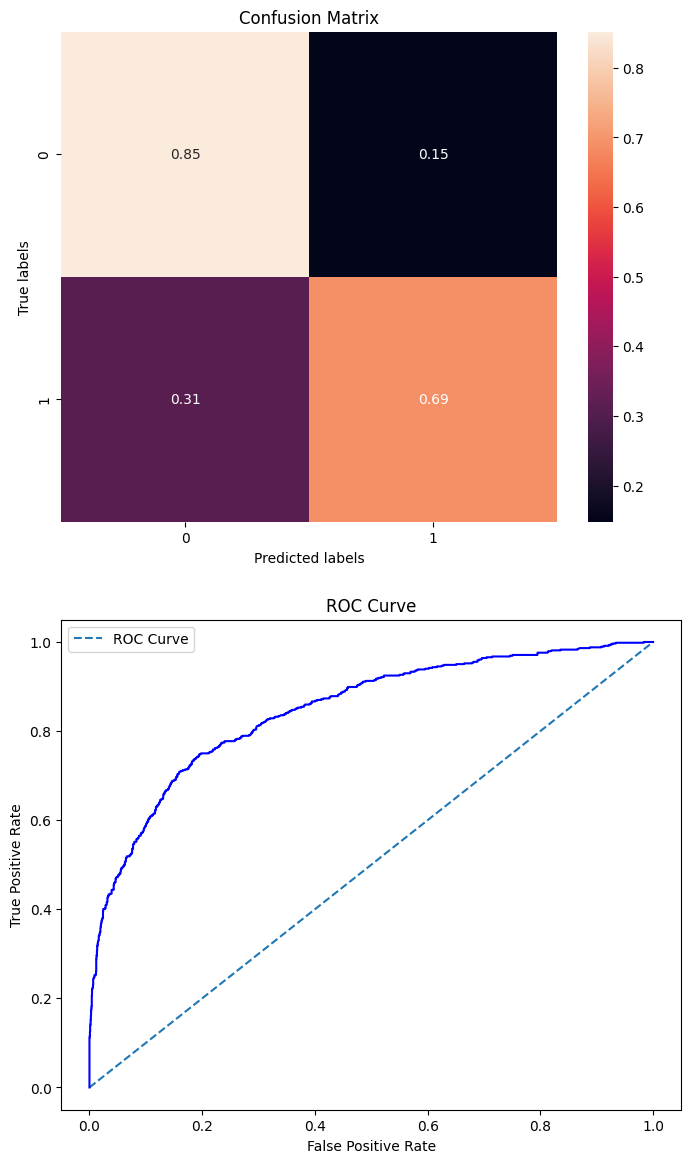

In [1026]:
Ada_boost=model_eval("Ada_Boost",Ada,X_train_res,X_test,y_train_res,y_test)

In [1027]:
Ada_boost

('Ada_Boost',
 AdaBoostClassifier(n_estimators=80, random_state=0),
 0.8425274923382008,
 0.82,
 0.8425274923382008,
 0.82,
 0.8425277706422115,
 0.8428684210526315,
 0.8425274603515686,
 0.8283836524300441,
 0.9204370999592482,
 0.8458900565862287)

In [1028]:
metrics_D.loc[6]=list(Ada_boost)
metrics_D

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   
5        Random_Forest_Hyperparameter_Tuning   
6                                  Ada_Boost   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=1, max_iter=150, solver='...        0.705697   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='log_loss', m...        0.860375   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   
5  (DecisionTreeClassifier(max_depth=10, max_feat...        0.894447   
6  (DecisionTreeClassifier(max_depth=1, random_st...        0.842527   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333         0.705620        0.796646   
1       0.704333      0.705697     0.704333         0.705709        0.796646   
2       0.777333      1.000000     0.777333         1.000000        0.795848   
3       0.778333      0.860375     0.778333         0.860401        0.810473   
4       0.844667      1.000000     0.844667         1.000000        0.843473   
5       0.823000      0.894447     0.823000         0.894536        0.842963   
6       0.820000      0.842527     0.820000         0.842528        0.842868   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867  
1  0.705692  0.731889   0.769416  0.763874  
2  1.000000  0.785193   1.000000  0.685819  
3  0.860372  0.790402   0.943607  0.793425  
4  1.000000  0.844053   1.000000  0.851133  
5  0.894442  0.830514   0.962116  0.858010  
6  0.842527  0.828384   0.920437  0.845890

Support Vector Machine Classification

In [1029]:
from sklearn.svm import SVC
SVM=SVC(probability=True).fit(X_train_res, y_train_res)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      2416
           1       0.47      0.72      0.57       584

    accuracy                           0.79      3000
   macro avg       0.70      0.76      0.71      3000
weighted avg       0.83      0.79      0.80      3000



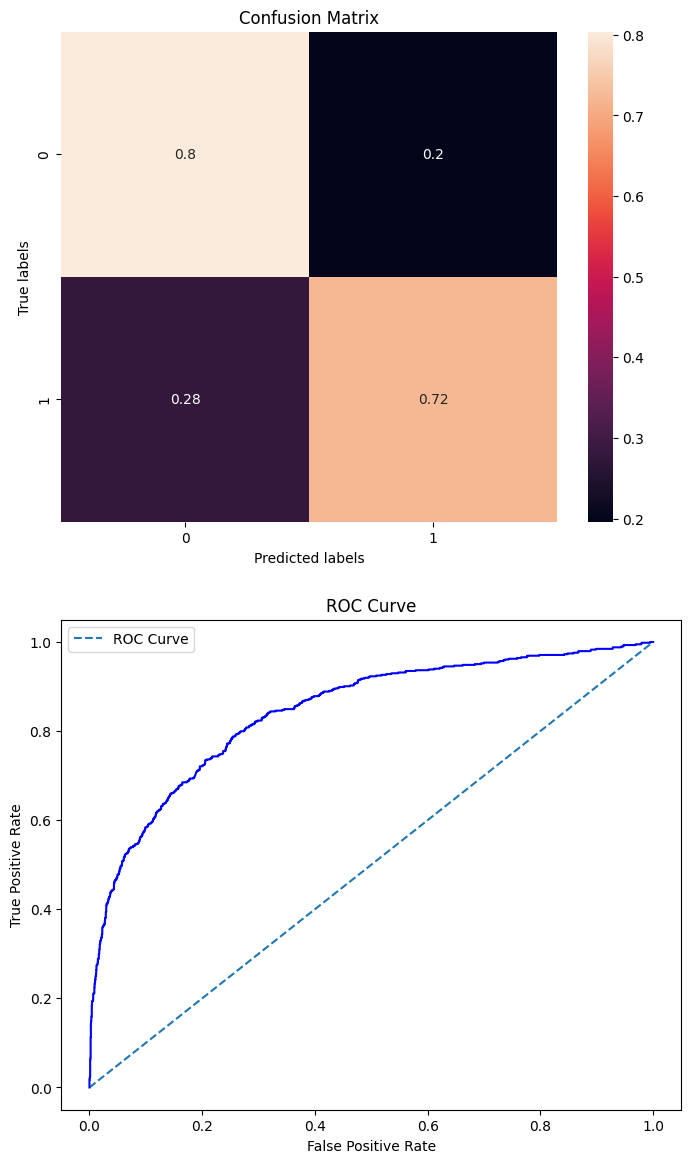

In [1030]:
support=model_eval("SVM",SVM,X_train_res,X_test,y_train_res,y_test)

In [1031]:
support

('SVM',
 SVC(probability=True),
 0.8359473589327564,
 0.7876666666666666,
 0.8359473589327564,
 0.7876666666666666,
 0.836039796825467,
 0.834542064871703,
 0.8359360762487377,
 0.8026878829604287,
 0.9145456095410187,
 0.8423672378209199)

In [1032]:
metrics_D.loc[7]=list(support)
metrics_D

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   
5        Random_Forest_Hyperparameter_Tuning   
6                                  Ada_Boost   
7                                        SVM   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=1, max_iter=150, solver='...        0.705697   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='log_loss', m...        0.860375   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   
5  (DecisionTreeClassifier(max_depth=10, max_feat...        0.894447   
6  (DecisionTreeClassifier(max_depth=1, random_st...        0.842527   
7                              SVC(probability=True)        0.835947   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333         0.705620        0.796646   
1       0.704333      0.705697     0.704333         0.705709        0.796646   
2       0.777333      1.000000     0.777333         1.000000        0.795848   
3       0.778333      0.860375     0.778333         0.860401        0.810473   
4       0.844667      1.000000     0.844667         1.000000        0.843473   
5       0.823000      0.894447     0.823000         0.894536        0.842963   
6       0.820000      0.842527     0.820000         0.842528        0.842868   
7       0.787667      0.835947     0.787667         0.836040        0.834542   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867  
1  0.705692  0.731889   0.769416  0.763874  
2  1.000000  0.785193   1.000000  0.685819  
3  0.860372  0.790402   0.943607  0.793425  
4  1.000000  0.844053   1.000000  0.851133  
5  0.894442  0.830514   0.962116  0.858010  
6  0.842527  0.828384   0.920437  0.845890  
7  0.835936  0.802688   0.914546  0.842367

SVM Hyperparameter Tuning

In [1033]:
param_list={
    "kernel":['linear','poly','rbf','sigmoid'],
    "C":[0.00001,0.0001,0.001,0.01,0.1,1,10],
    "gamma":['scale','auto'],
    "degree":[2,3,4,5],
}
SVM_HT=SVC(probability=True)

In [1034]:
SVM_CV = RandomizedSearchCV(SVM_HT,param_list,n_iter=10)
SVM_CV.fit(X_train_res,y_train_res)

RandomizedSearchCV(estimator=SVC(probability=True),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10],
                                        'degree': [2, 3, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [1035]:
print("best parameters: ",SVM_CV.best_params_)
best_SVM_cv=SVM_CV.best_estimator_

best parameters:  {'kernel': 'poly', 'gamma': 'auto', 'degree': 5, 'C': 1}


              precision    recall  f1-score   support

           0       0.91      0.82      0.87      2416
           1       0.48      0.67      0.56       584

    accuracy                           0.79      3000
   macro avg       0.70      0.75      0.71      3000
weighted avg       0.83      0.79      0.81      3000



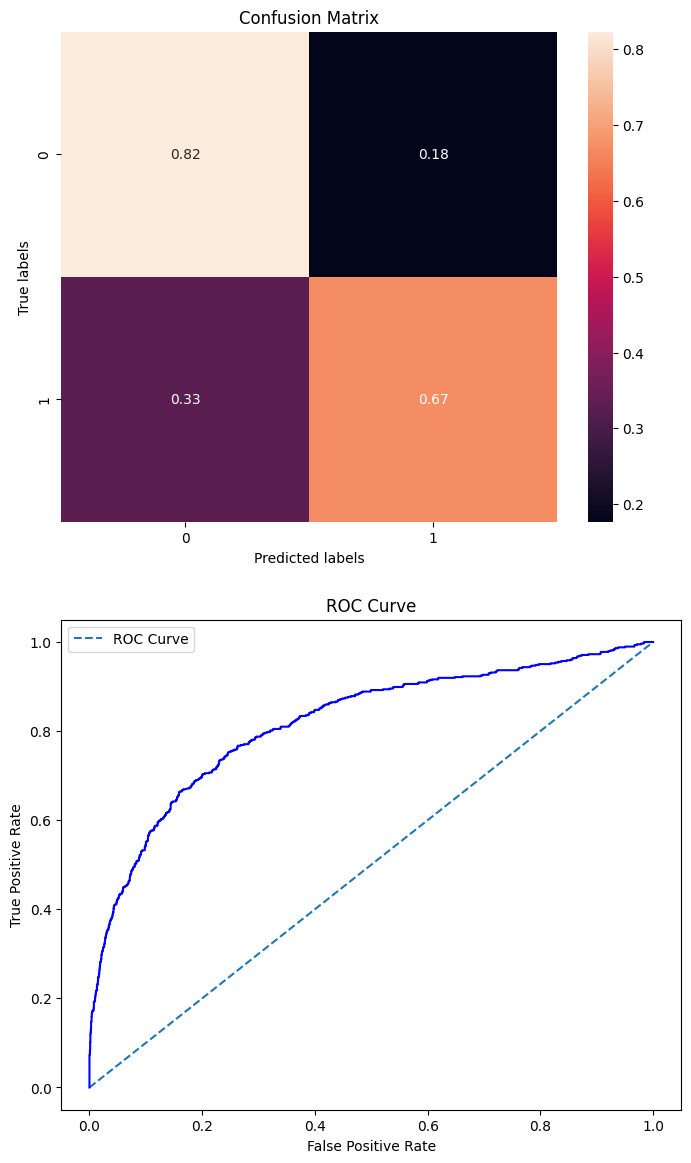

In [1036]:
Random_SVM=model_eval("SVM_Hyperparameter_Tuning",best_SVM_cv,X_train_res,X_test,y_train_res,y_test)

In [1037]:
Random_SVM

('SVM_Hyperparameter_Tuning',
 SVC(C=1, degree=5, gamma='auto', kernel='poly', probability=True),
 0.8579412294934199,
 0.7936666666666666,
 0.8579412294934199,
 0.7936666666666666,
 0.8579919104440382,
 0.8276112032040506,
 0.8579362014968741,
 0.8056729889797146,
 0.9335947342682746,
 0.8165455184613989)

In [1038]:
metrics_D.loc[8]=list(Random_SVM)
metrics_D

model_name  \
0                        Logistic_Regression   
1  Logistic_Regression_Hyperparameter_Tuning   
2                              Desicion Tree   
3        Desicion_Tree_Hyperparameter_Tuning   
4                              Random Forest   
5        Random_Forest_Hyperparameter_Tuning   
6                                  Ada_Boost   
7                                        SVM   
8                  SVM_Hyperparameter_Tuning   

                                               model  Train_Accuracy  \
0                 LogisticRegression(random_state=0)        0.705607   
1  LogisticRegression(C=1, max_iter=150, solver='...        0.705697   
2                           DecisionTreeClassifier()        1.000000   
3  DecisionTreeClassifier(criterion='log_loss', m...        0.860375   
4  (DecisionTreeClassifier(max_features='sqrt', r...        1.000000   
5  (DecisionTreeClassifier(max_depth=10, max_feat...        0.894447   
6  (DecisionTreeClassifier(max_depth=1, random_st...        0.842527   
7                              SVC(probability=True)        0.835947   
8  SVC(C=1, degree=5, gamma='auto', kernel='poly'...        0.857941   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0       0.704333      0.705607     0.704333         0.705620        0.796646   
1       0.704333      0.705697     0.704333         0.705709        0.796646   
2       0.777333      1.000000     0.777333         1.000000        0.795848   
3       0.778333      0.860375     0.778333         0.860401        0.810473   
4       0.844667      1.000000     0.844667         1.000000        0.843473   
5       0.823000      0.894447     0.823000         0.894536        0.842963   
6       0.820000      0.842527     0.820000         0.842528        0.842868   
7       0.787667      0.835947     0.787667         0.836040        0.834542   
8       0.793667      0.857941     0.793667         0.857992        0.827611   

   Train_F1   Test_F1  Train_AUC  Test_AUC  
0  0.705602  0.731889   0.769416  0.763867  
1  0.705692  0.731889   0.769416  0.763874  
2  1.000000  0.785193   1.000000  0.685819  
3  0.860372  0.790402   0.943607  0.793425  
4  1.000000  0.844053   1.000000  0.851133  
5  0.894442  0.830514   0.962116  0.858010  
6  0.842527  0.828384   0.920437  0.845890  
7  0.835936  0.802688   0.914546  0.842367  
8  0.857936  0.805673   0.933595  0.816546

## We chose Random Forest with HyperParameter tuning as the best model for evaluation based on its accuracy score, highest roc-auc. Though random forest has more accuracy than this, its training accuracy is 1 indicating overfitting, so we chose Random Forest with Hyper paramter tuning.

In [1051]:
best_model = metrics_A.loc[metrics_A['model_name']=="Random_Forest_Hyperparameter_Tuning"]['model'].iloc[0]

In [1052]:
best_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=40,
                       min_samples_split=30, n_estimators=80)

# User Prediction

In [1059]:
print("Give the input data to make prediction on in the following format--->")
credit_score = input("Enter Credit_score: ",)
geography = input("Enter Geography: ",)
gender = input("Enter the gender: ",)
age = input("Enter Age: ",)
tenure = input("Enter Tenure: ",)
balance = input("Balance: ",)
Num_prod = input("Enter number of products: ",)
HasCrCard = input("Enter 1 if customer has credit card else enter 0: ",)
IsActiveMember = input("Enter 1 if customer is an active member else enter 0: ",)
Estimated_Salary = input("Enter EstimatedSalary: ",)

Give the input data to make prediction on in the following format--->
Enter Credit_score: 608
Enter Geography: Spain
Enter the gender: Female
Enter Age: 41
Enter Tenure: 1
Balance: 83807.86
Enter number of products: 1
Enter 1 if customer has credit card else enter 0: 0
Enter 1 if customer is an active member else enter 0: 1
Enter EstimatedSalary: 112542.58


In [1060]:
le = LabelEncoder()
newd = df.copy()
newd[["Geography"]] = newd[["Geography"]].apply(le.fit_transform)
geography2 = le.transform([geography])
newd[["Gender"]] = newd[["Gender"]].apply(le.fit_transform)
gender2 = le.transform([gender])

In [1061]:
input_data = np.array([[int(credit_score),int(geography2),int(gender2),int(age),int(tenure),float(balance),int(Num_prod),int(HasCrCard),int(IsActiveMember),float(Estimated_Salary)]])

<ipython-input-1061-8d036955c94f>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_data = np.array([[int(credit_score),int(geography2),int(gender2),int(age),int(tenure),float(balance),int(Num_prod),int(HasCrCard),int(IsActiveMember),float(Estimated_Salary)]])


In [1062]:
scaled_input = scaler.transform(input_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1063]:
df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [1064]:
best_model.predict(scaled_input)

array([0])